IMPORTING LIBRARIES 📚

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import matplotlib.ticker as mticker

Reading CSV files 🔍

In [2]:
club = pd.read_csv("club.csv")
players_data = pd.read_csv("players_data.csv") 
club_players = pd.read_csv("club_players.csv")
league_goals = pd.read_csv("league_goals.csv")
players_stats = pd.read_csv("players_stats.csv")
players_transfers = pd.read_csv("players_transfers.csv")

آمار توصیفی 🌭

1️⃣

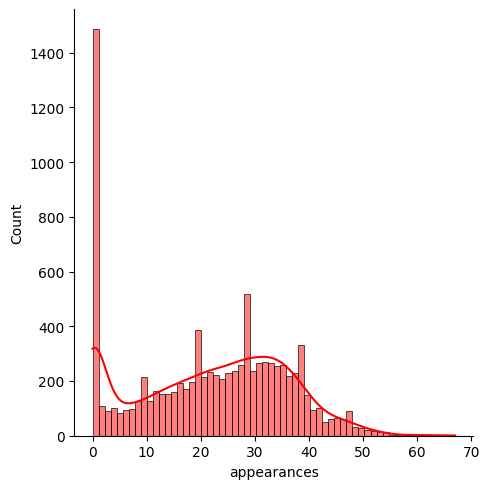

In [3]:
minuts_play = players_stats.copy()
minuts_play["appearances"] = minuts_play["appearances"].replace("-", np.nan)
minuts_play["appearances"] = minuts_play["appearances"].fillna("0").astype(float).astype(int)
sns.displot(minuts_play["appearances"],kde = True, color = "red", bins = 60);

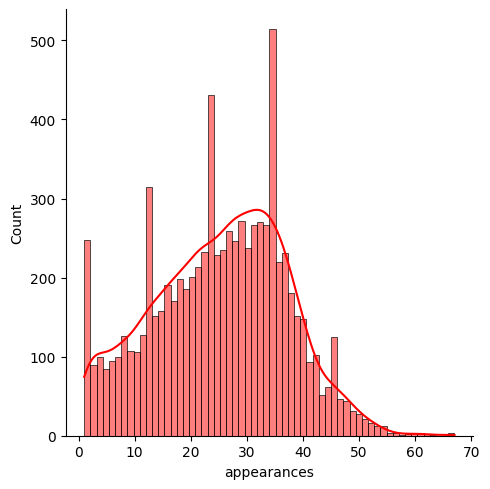

In [4]:
appearances_in_season = players_stats.copy()
appearances_in_season["appearances"] = appearances_in_season["appearances"].replace("-", np.nan)
sns.displot(appearances_in_season["appearances"].dropna().astype(float).astype(int), kde = True, color = "red", bins = 60);

2️⃣

In [5]:
#Cleaning Data and Making DataFrame ready as required

filtered_df_2021 = club_players[club_players["Season"] == 2021]
data_df = pd.merge(players_stats, filtered_df_2021, left_on = "id", right_on = "PlayerID", how = "inner")
data_df = data_df[["id", "Player_name", "Player_possition", "Player_MarketValue", "goals"]]
player_market_values_list = data_df["Player_MarketValue"].tolist()
player_market_values_list = [value.replace("\xa0", "").replace("€", "") for value in player_market_values_list]

final_list = []
for i in range(len(player_market_values_list)):
    if player_market_values_list[i] == "":
        final_list += [""]
    elif player_market_values_list[i] == np.nan:
        final_list += [np.nan]
    else:
        if (player_market_values_list[i][-1]) == "m":
            final_list += [float(player_market_values_list[i].replace("m", "")) * 1000000]
        elif (player_market_values_list[i][-1]) == "b":
            final_list += [float(player_market_values_list[i].replace("b", "")) * 1000000000]
        elif (player_market_values_list[i][-1]) == "k":
            final_list += [float(player_market_values_list[i].replace("k", "")) * 1000]

data_df["Player_MarketValue"] = final_list
data_df = data_df.dropna(subset = ["Player_MarketValue"])
data_df = data_df[data_df["Player_MarketValue"] != ""]
data_df = data_df[data_df["Player_MarketValue"] != 0]
data_df["goals"].replace(["-", np.nan], 0, inplace = True)
data_df["Player_MarketValue"] = data_df["Player_MarketValue"].astype(int)
data_df["goals"] = pd.to_numeric(data_df["goals"], errors = "coerce")
unique_positions = list(data_df["Player_possition"].unique())

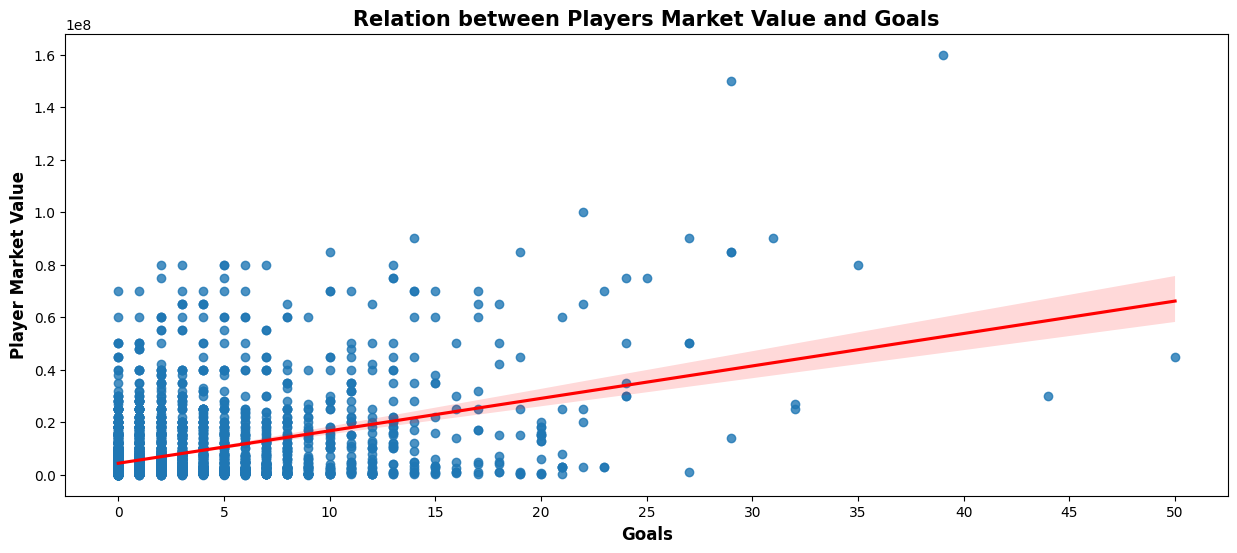

In [6]:
#Regression Plot for all players

fig, ax = plt.subplots(figsize = (15, 6))
sns.regplot(x = "goals", y = "Player_MarketValue", data = data_df, line_kws = {"color" : "red"}, ci = 90)
plt.title("Relation between Players Market Value and Goals", fontweight = "bold", fontsize = 15)
plt.ylabel("Player Market Value", fontweight = "bold", fontsize = 12)
plt.xlabel("Goals", fontweight = "bold", fontsize = 12)
ax.set_xticks(range(0, 51, 5))
plt.show()

3️⃣

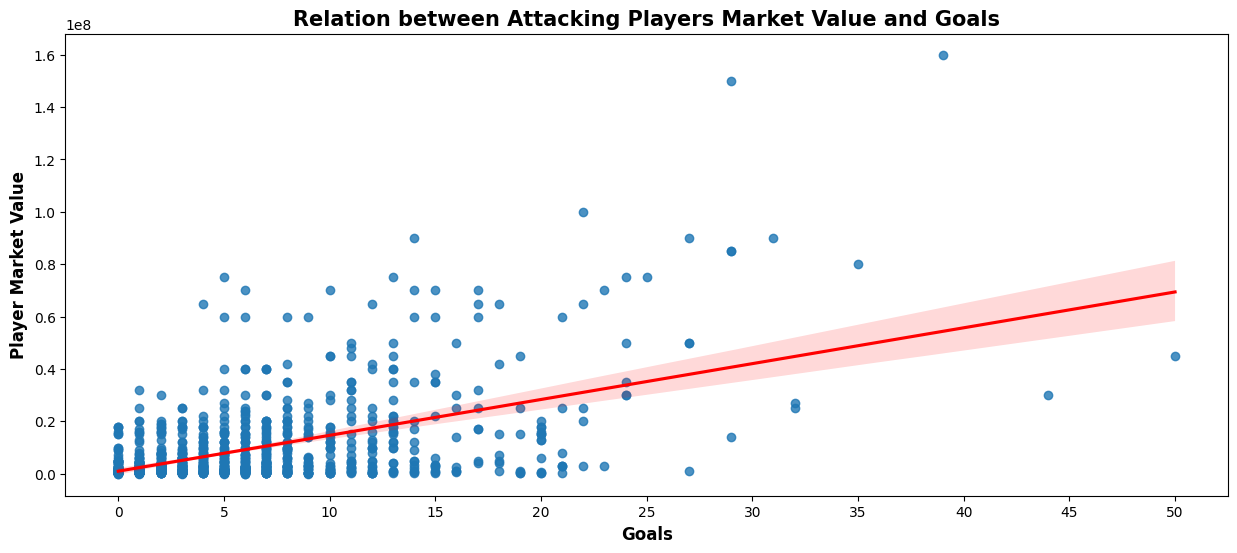

In [7]:
# Regression Plot for Attacking players

attack_df = data_df[data_df["Player_possition"].isin(["Right Winger", "Left Winger", "Centre-Forward", "Second Striker"])]

fig, ax = plt.subplots(figsize = (15, 6))
sns.regplot(x = "goals", y = "Player_MarketValue", data = attack_df, line_kws = {"color" : "red"}, ci = 90)
plt.title("Relation between Attacking Players Market Value and Goals", fontweight = "bold", fontsize = 15)
plt.ylabel("Player Market Value", fontweight = "bold", fontsize = 12)
plt.xlabel("Goals", fontweight = "bold", fontsize = 12)
ax.set_xticks(range(0, 51, 5))
plt.show()

4️⃣

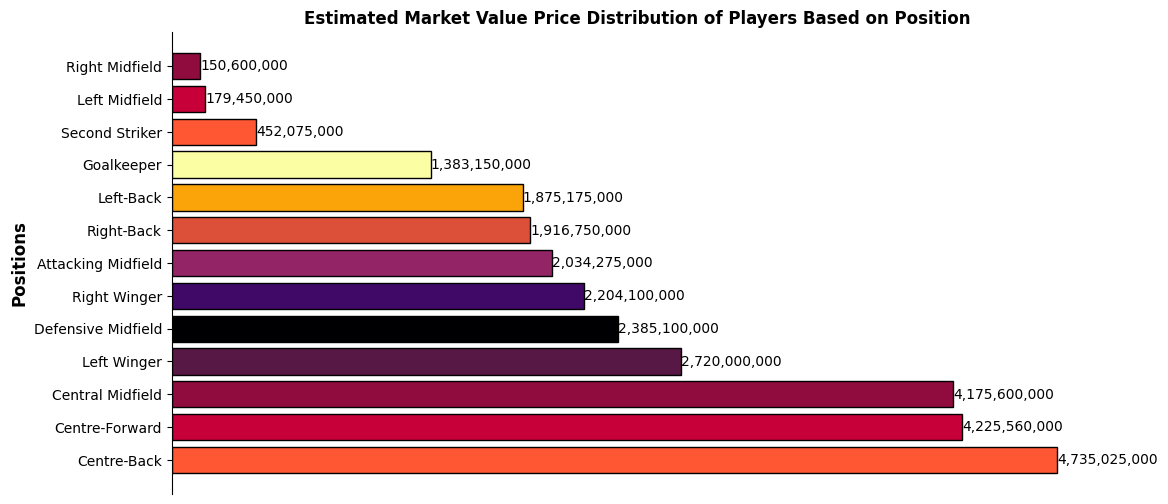

In [8]:
#Distribution of MarketValue based on players position

sum_df = data_df.groupby("Player_possition")["Player_MarketValue"].sum()
mv_sum_df = pd.DataFrame({"Player_position" : sum_df.index, "Value" : sum_df.values})
mv_sum_df = mv_sum_df.sort_values("Value", ascending = False)

fig, ax = plt.subplots(figsize = (12, 6))
colors = ["#FF5733", "#C70039", "#900C3F", "#581845", "#000003", "#410967", "#932567", "#DC5039", "#FBA40A", "#FCFEA4"]
bars = ax.barh(mv_sum_df["Player_position"], mv_sum_df["Value"], color = colors, edgecolor = "black")
plt.xlabel("Market Value", fontweight = "bold", fontsize = 12)
plt.ylabel("Positions", fontweight = "bold", fontsize = 12)
plt.title("Estimated Market Value Price Distribution of Players Based on Position", fontweight = "bold", fontsize = 12)
ax.xaxis.set_visible(False)
for i, bar in enumerate(bars):
    value = bar.get_width()
    formatted_value = "{:,.0f}".format(value)
    ax.text(value, bar.get_y() + bar.get_height() / 2, formatted_value, ha = "left", va = "center")

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.show()

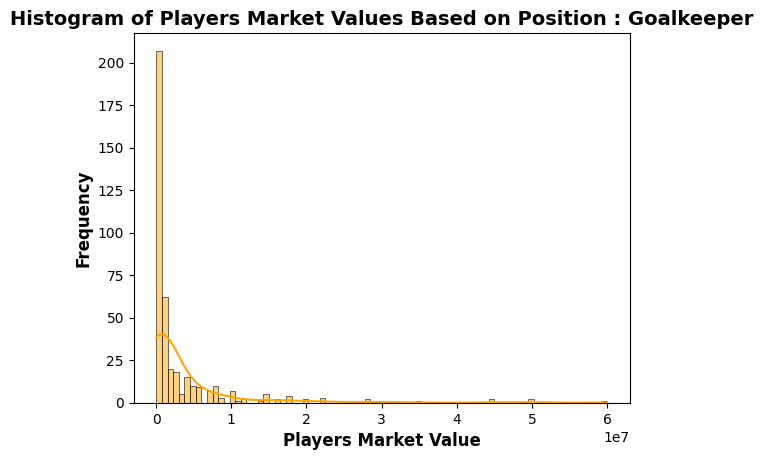

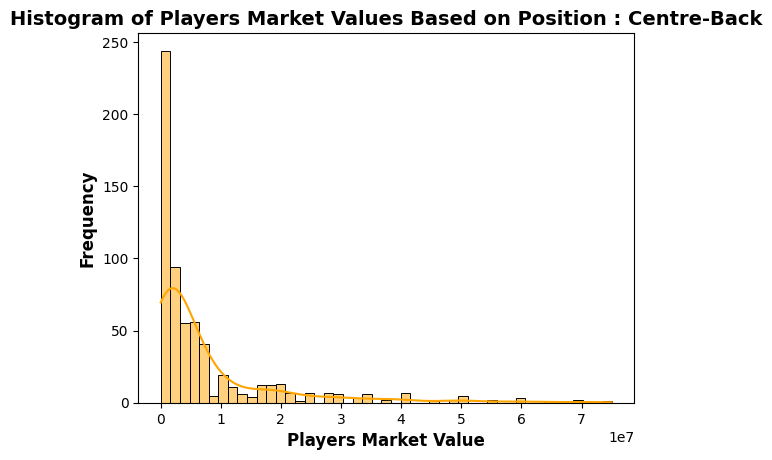

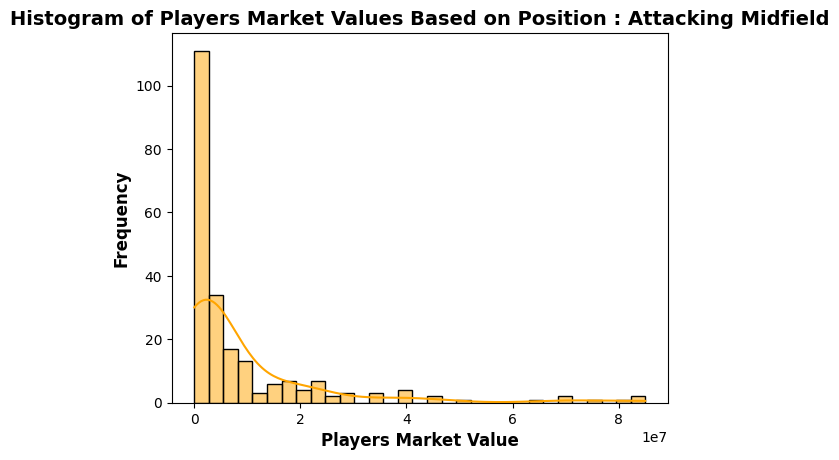

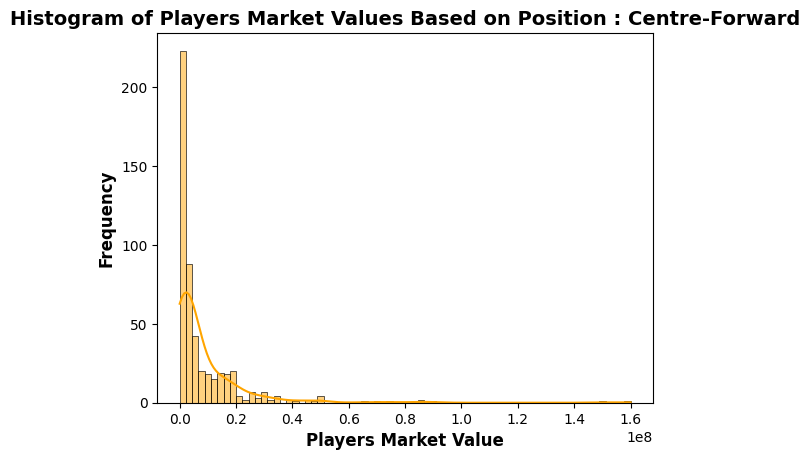

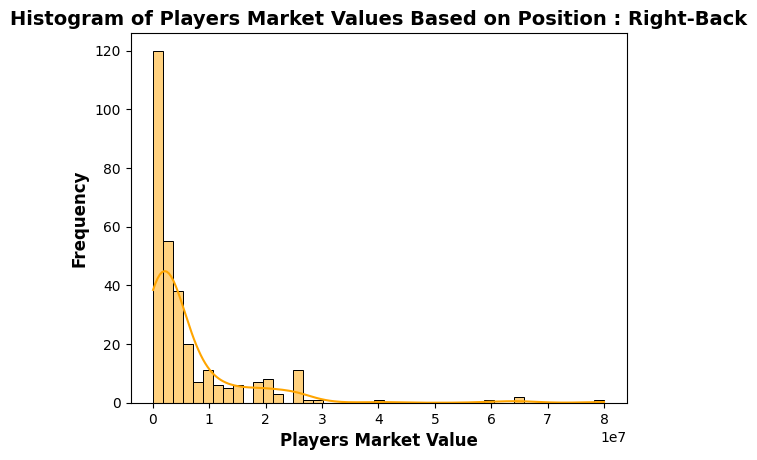

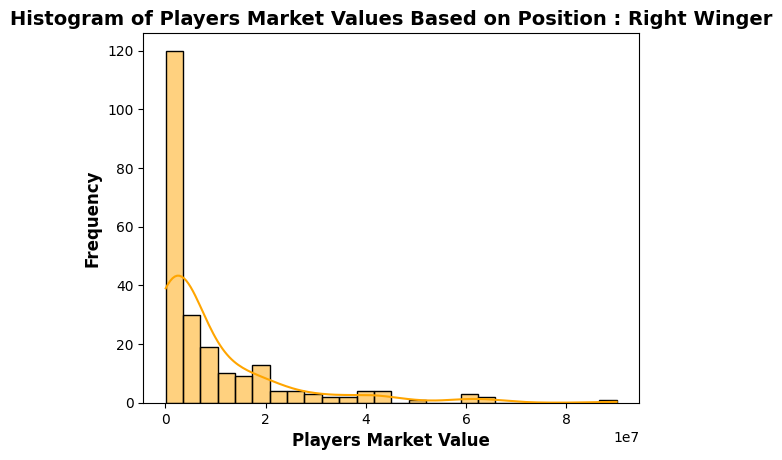

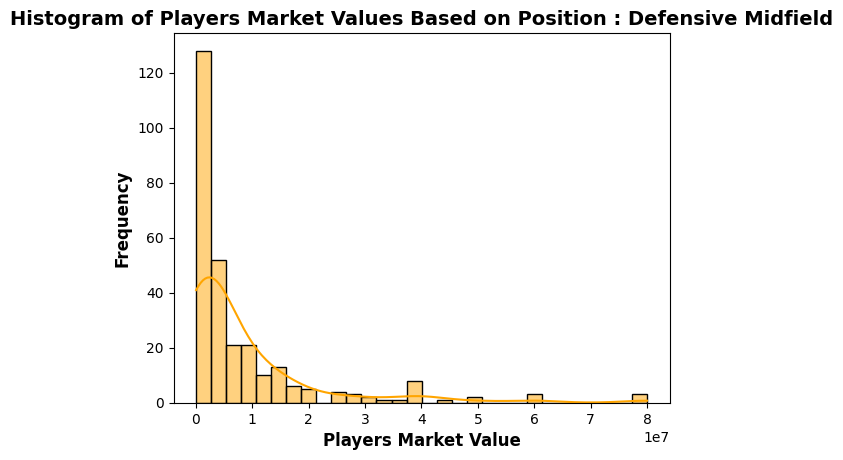

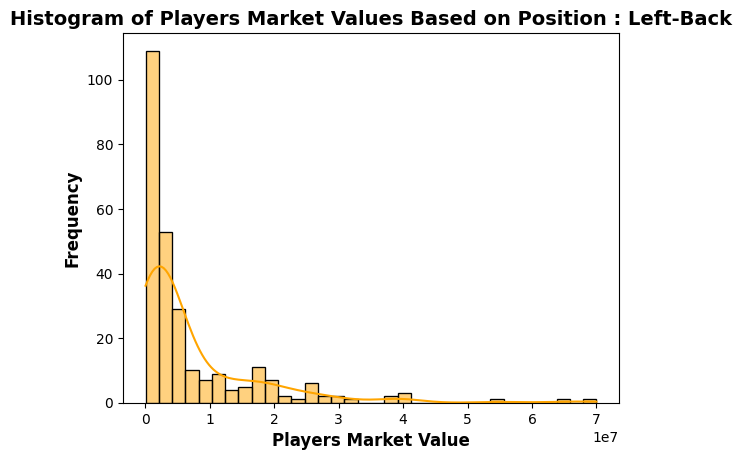

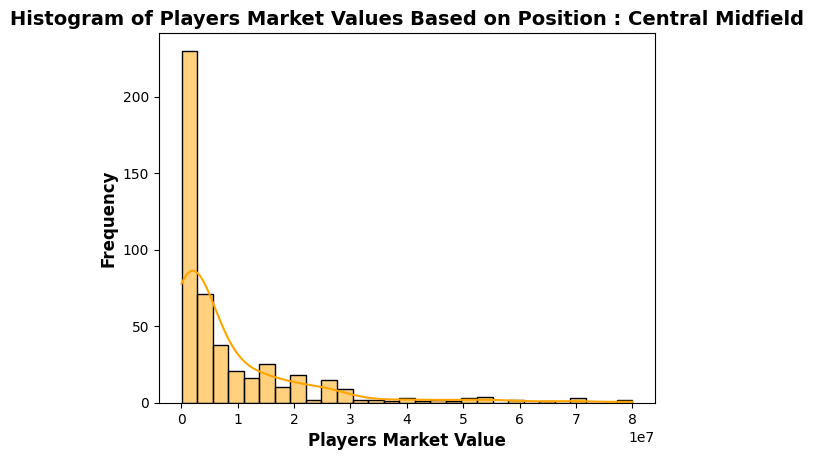

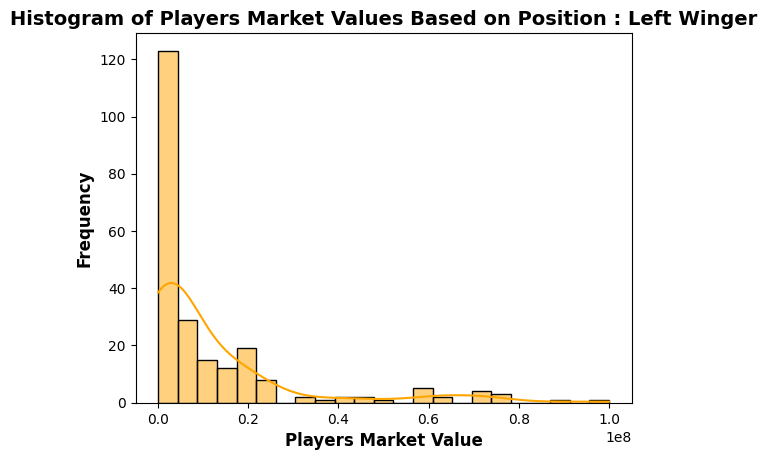

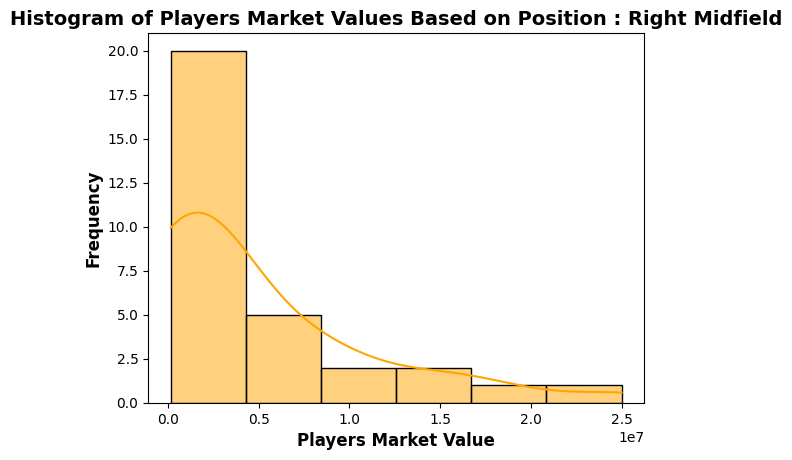

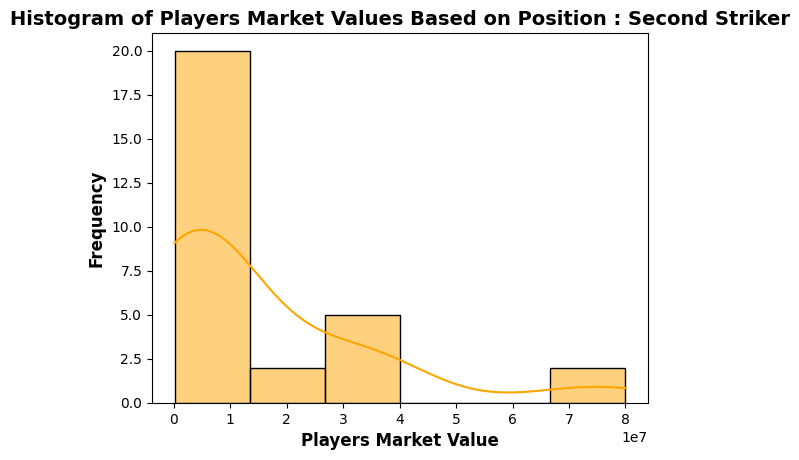

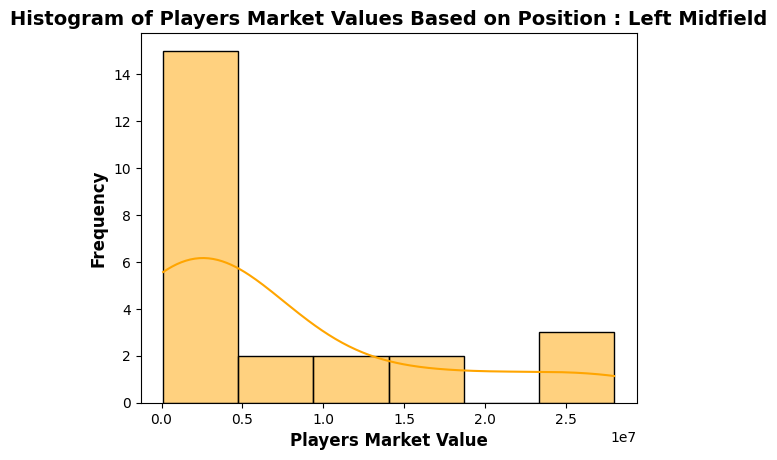

In [9]:
#Histogram for each Position

for i in unique_positions:
    selected_position = data_df[data_df["Player_possition"] == i].copy()
    sns.histplot(selected_position["Player_MarketValue"], kde = True, color = "orange")
    plt.xlabel("Players Market Value", fontweight = "bold", fontsize = 12)
    plt.ylabel("Frequency", fontweight = "bold", fontsize = 12)
    plt.title("Histogram of Players Market Values Based on Position : " + i, fontweight = "bold", fontsize = 14)
    plt.show()

5️⃣

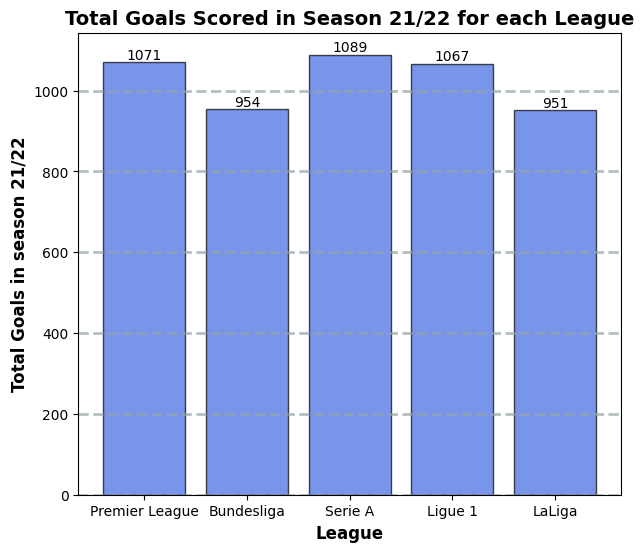

In [10]:
#Total Goals for each League in Season 2021/2022 

league_goals_filtered_season = league_goals[league_goals["Season"] == 2021]
data = league_goals_filtered_season["Goals"].tolist()
x_labels = league_goals_filtered_season["League"].tolist()

fig, ax = plt.subplots(figsize = (7, 6))
plt.bar(range(len(data)), data, color = "royalblue", alpha = 0.7, edgecolor = "black")
plt.grid(color = "#95a5a6", linestyle = "--", linewidth = 2, axis = "y", alpha = 0.7)

for i, value in enumerate(data):
    plt.text(i, value, str(value), ha = "center", va = "bottom", fontsize = 10)

plt.xticks(range(len(data)), x_labels)
plt.title("Total Goals Scored in Season 21/22 for each League", fontweight = "bold", fontsize = 14)
plt.xlabel("League", fontweight = "bold", fontsize = 12)
plt.ylabel("Total Goals in season 21/22", fontweight = "bold", fontsize = 12)
plt.show()

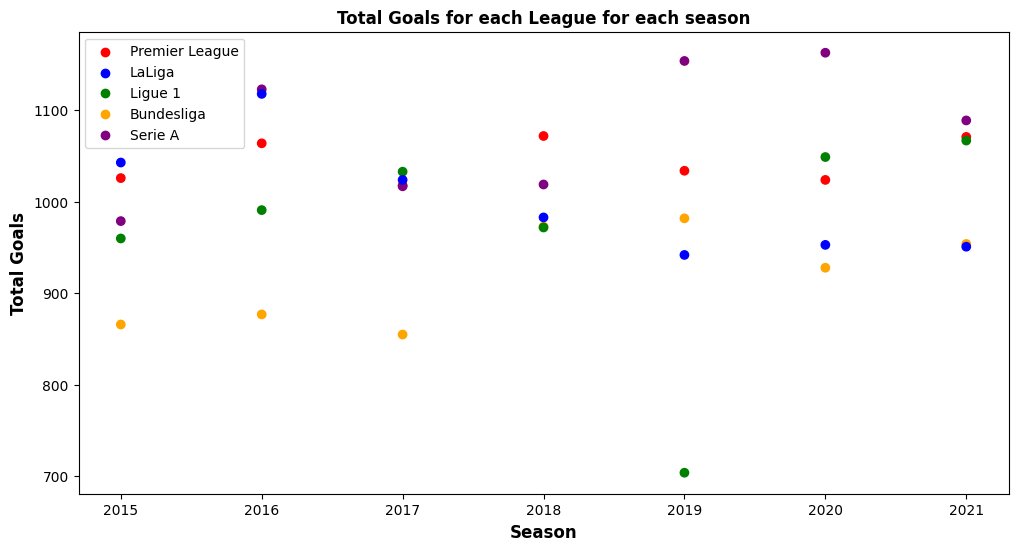

In [11]:
#Total Goals for each League for all seasons

League_list = league_goals["League"].tolist()
Season_list = league_goals["Season"].tolist()
Goals_list = league_goals["Goals"].tolist()

plt.figure(figsize = (12, 6))
country_colors = {"Premier League" : "red", "LaLiga" : "blue", "Ligue 1" : "green", "Bundesliga" : "orange", "Serie A" : "purple"}

plt.scatter(Season_list, Goals_list, c = [country_colors[country] for country in League_list])

plt.xlabel("Season", fontweight = "bold", fontsize = 12)
plt.ylabel("Total Goals", fontweight = "bold", fontsize = 12)
plt.title("Total Goals for each League for each season", fontweight = "bold", fontsize = 12)

legend_labels = list(country_colors.keys())
legend_handles = [plt.scatter([], [], c = country_colors[country]) for country in legend_labels]
plt.legend(legend_handles, legend_labels)
plt.show()

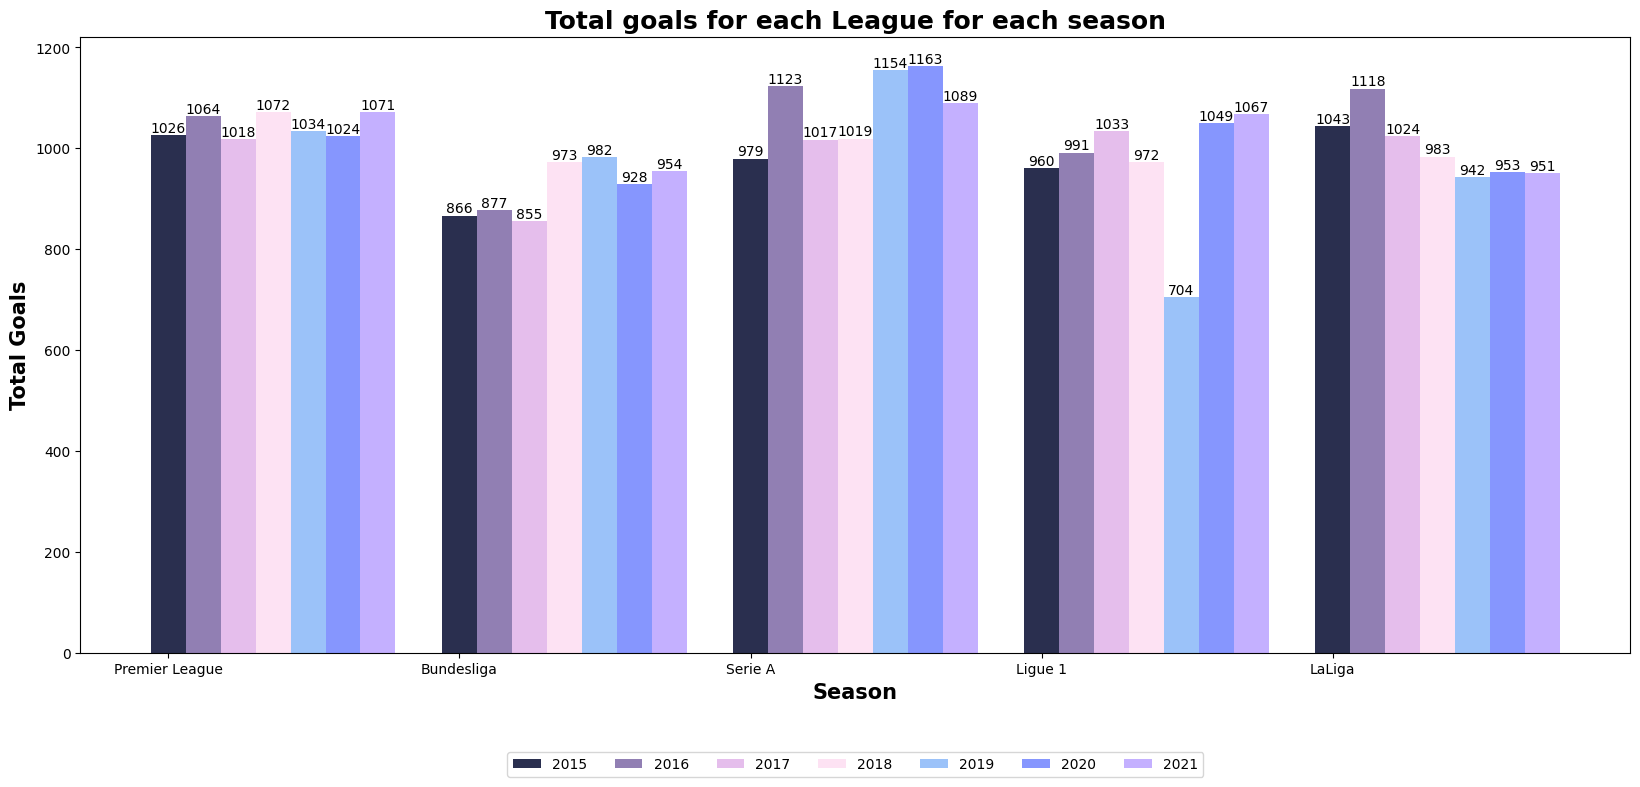

In [12]:
data = {"Country" : League_list, "Season" : Season_list, "Goals" : Goals_list}
colors = ["#2A2F4F", "#917FB3", "#E5BEEC", "#FDE2F3", "#9BC2F9", "#8696FE", "#C4B0FF"]
league_goals = pd.DataFrame(data)
countries = league_goals["Country"].unique()
years = league_goals["Season"].unique()
bar_width = 0.12
value = np.arange(len(countries))

fig, ax = plt.subplots(figsize = (20, 8))

for i, year in enumerate(years):
    goals = league_goals[league_goals["Season"] == year]["Goals"]
    ax.bar(value + (i * bar_width), goals, bar_width, label = str(year), color = colors[i % len(colors)])
    for j, goal in enumerate(goals):
        ax.text(value[j] + (i * bar_width), goal, str(goal), ha = "center", va = "bottom")

ax.set_xticks(value)
ax.set_xticklabels(countries)
plt.xlabel("Season", fontweight = "bold", fontsize = 15)
plt.ylabel("Total Goals", fontweight = "bold", fontsize = 15)
plt.title("Total goals for each League for each season", fontweight = "bold", fontsize = 18)
ax.legend(loc = "upper center", bbox_to_anchor = (0.5, -0.15), ncol = len(years))
plt.show()

6️⃣

In [13]:
#Get Data ready

def right_format(value):
    value = value.replace("€", "")
    if "m" == value[-1]:
            value = value.replace("m", "")
            value = float(value) * (10 ** 6)
    elif "k" == value[-1]:
        value = value.replace("k", "")
        value = float(value) * (10 ** 3)
    elif "b" == value[-1]:
        value = value.replace("b", "")
        value = float(value) * (10 ** 9)
               
    return value

transfer = players_transfers.copy()
transfer["fee"] = transfer["fee"].replace("loan transfer", np.nan).replace("End of loan", np.nan).replace("free transfer", np.nan).replace("draft", ).replace("?", np.nan).replace("-", np.nan)
transfer.dropna(subset = ["fee"], inplace = True)
transfer["fee"] = transfer["fee"].astype(str)
transfer["fee"] = transfer["fee"].apply(lambda x: x.replace("Loan fee:", ""))
transfer["mv"] = transfer["mv"].replace("loan transfer", np.nan).replace("End of loan", np.nan).replace("free transfer", np.nan).replace("draft", ).replace("?", np.nan).replace("-", np.nan)
transfer.dropna(subset = ["mv"], inplace = True)
transfer["mv"] = transfer["mv"].astype(str)
transfer["mv"] = transfer["mv"].apply(lambda x: x.replace("Loan fee:", ""))
transfer["fee"] = transfer["fee"].apply(right_format).astype(float)
transfer["mv"] = transfer["mv"].apply(right_format).astype(float)
transfer["season"] = transfer["season"].apply(lambda x: "20" + str(x.split("/")[0]))
transfer.rename(columns = {"season" : "Season", "player_id" : "PlayerID"}, inplace = True)
transfer["Season"] = transfer["Season"].astype(int)
result = pd.merge(transfer, club_players, on = ["Season", "PlayerID"])
result = result.groupby(["joined", "Season"])["fee"].sum().reset_index()


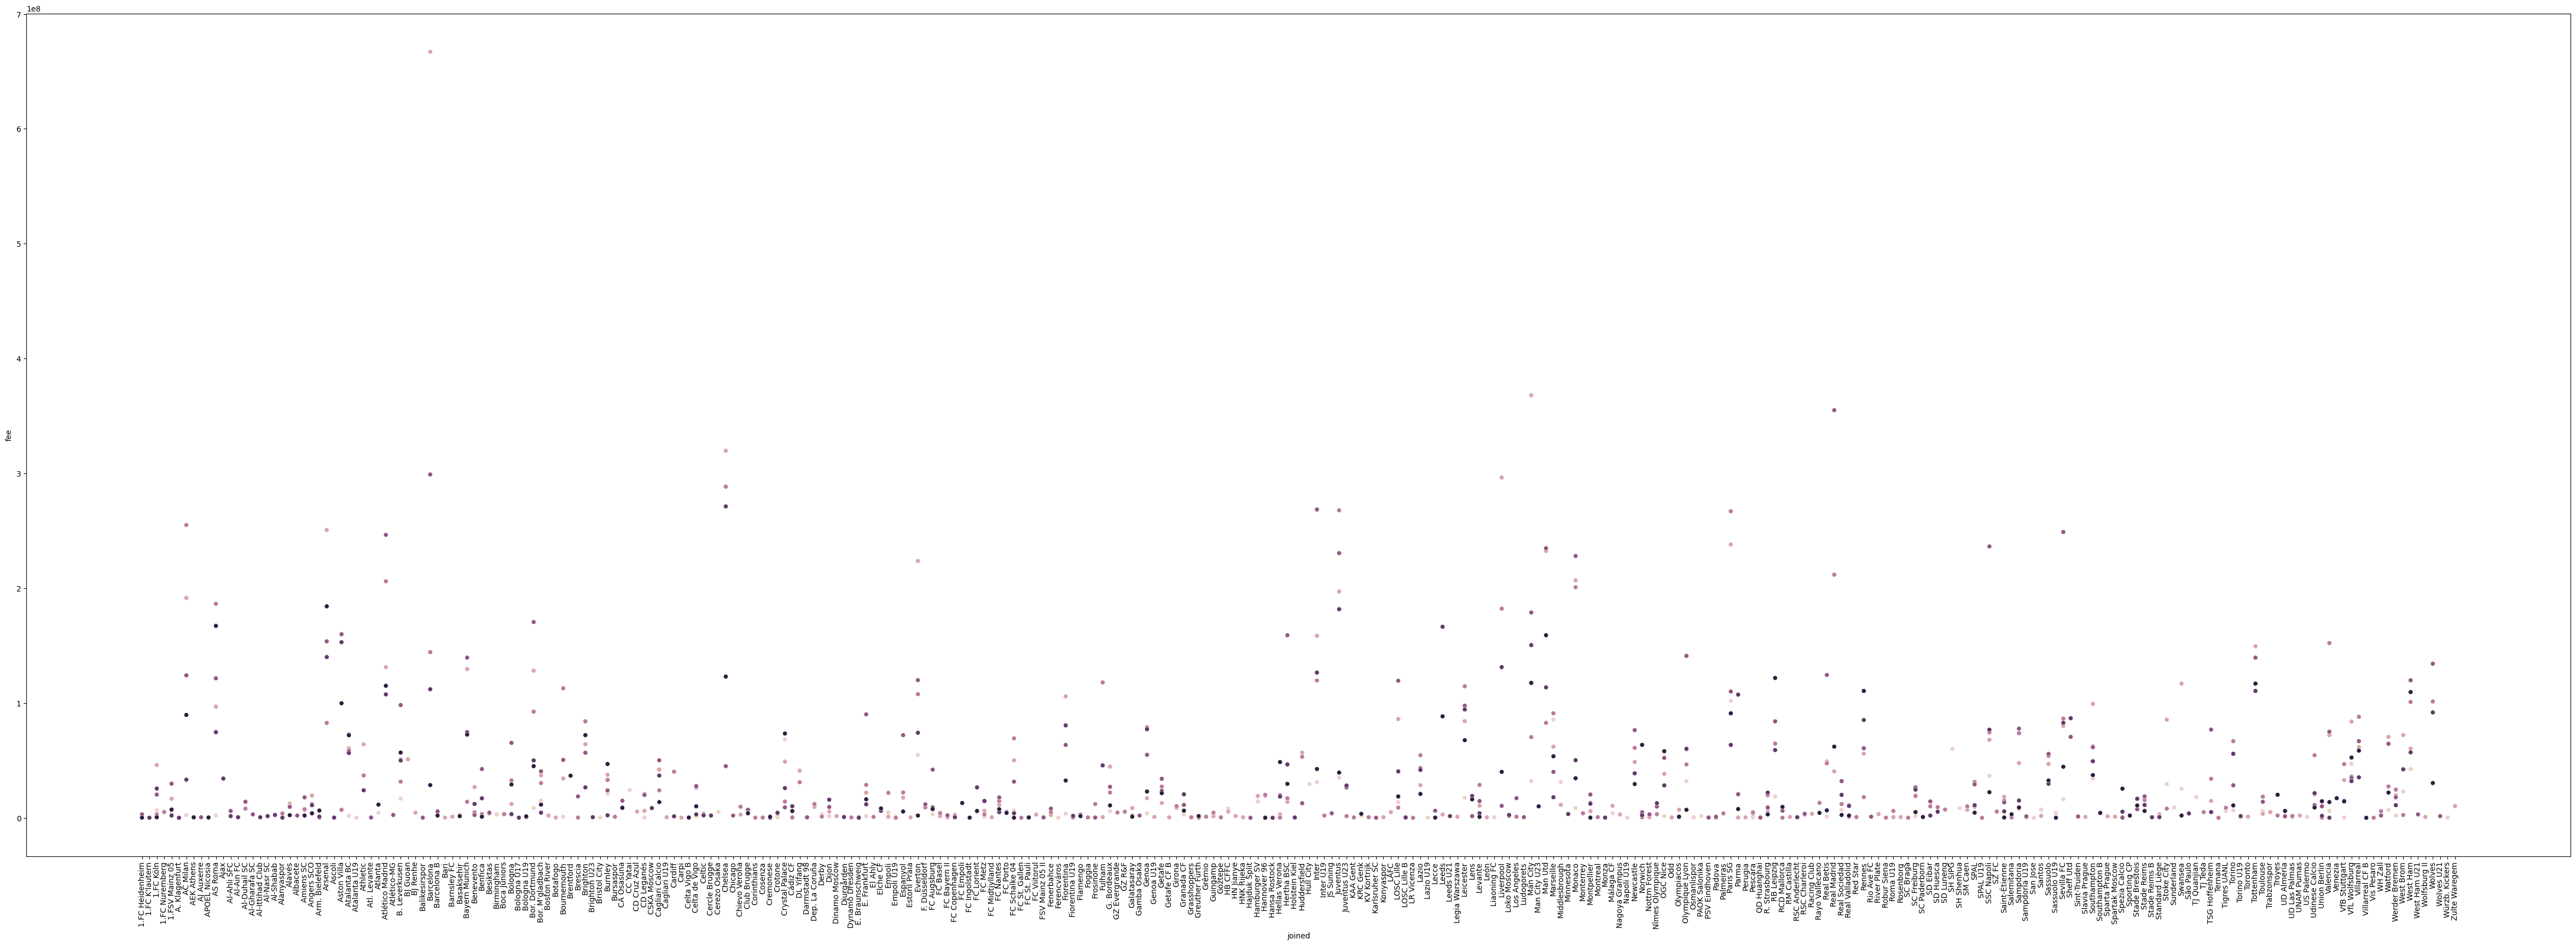

In [14]:
plt.subplots(figsize = (60, 20))
sns.scatterplot(x = "joined", y = "fee", hue = "Season", data = result, legend = False)
plt.xticks(rotation = 90);

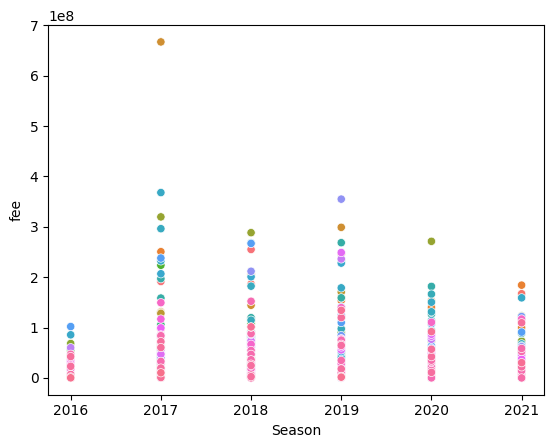

In [15]:
sns.scatterplot(x = "Season", y = "fee", hue = "joined", data = result, legend = False);

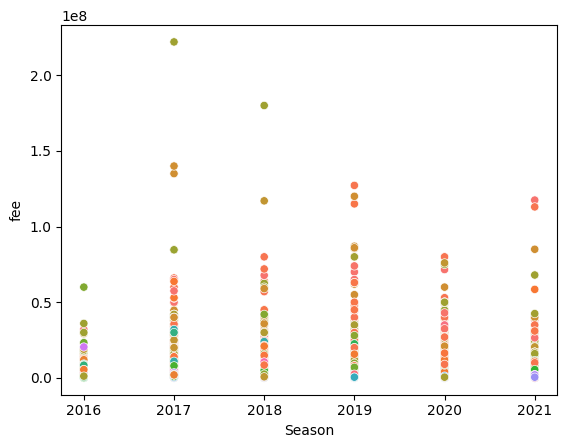

In [16]:
sns.scatterplot(x = "Season", y = "fee", hue = "joined", data = transfer, legend = False);

درخواست کارشناس 🍕

In [17]:
#Cleaning Data
players_transfers["fee"] = players_transfers["fee"].replace("loan transfer", np.nan).replace("End of loan", np.nan).replace("free transfer", np.nan).replace("draft", np.nan).replace("?", np.nan).replace("-", np.nan)
players_transfers.dropna(subset = ["fee"], inplace = True)
players_transfers["fee"] = players_transfers["fee"].astype(str)
players_transfers["fee"] = players_transfers["fee"].apply(lambda x: x.replace("Loan fee:", ""))

players_transfers["fee"] = players_transfers["fee"].apply(right_format).astype(float)
players_transfers["mv"] = players_transfers["mv"].replace("?", np.nan).replace("-", np.nan)
players_transfers.dropna(subset = ["mv"], inplace = True)
players_transfers["mv"] = players_transfers["mv"].astype(str)
players_transfers["mv"] = players_transfers["mv"].apply(right_format).astype(float)

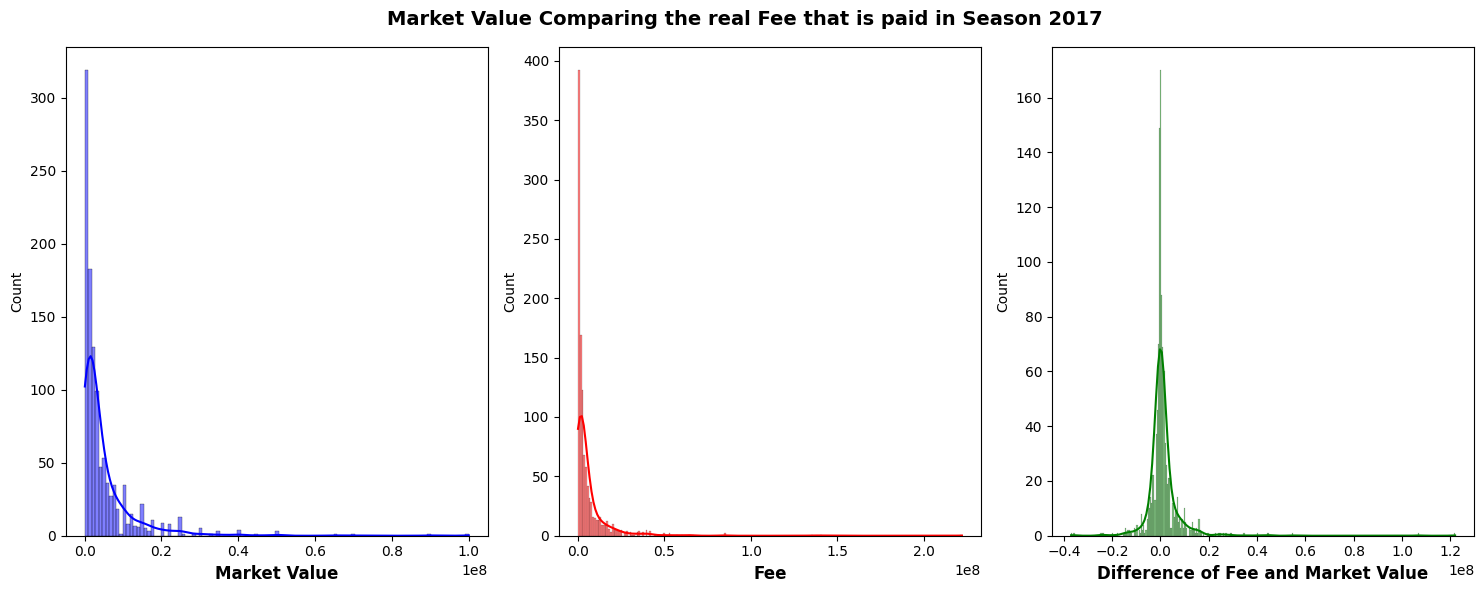

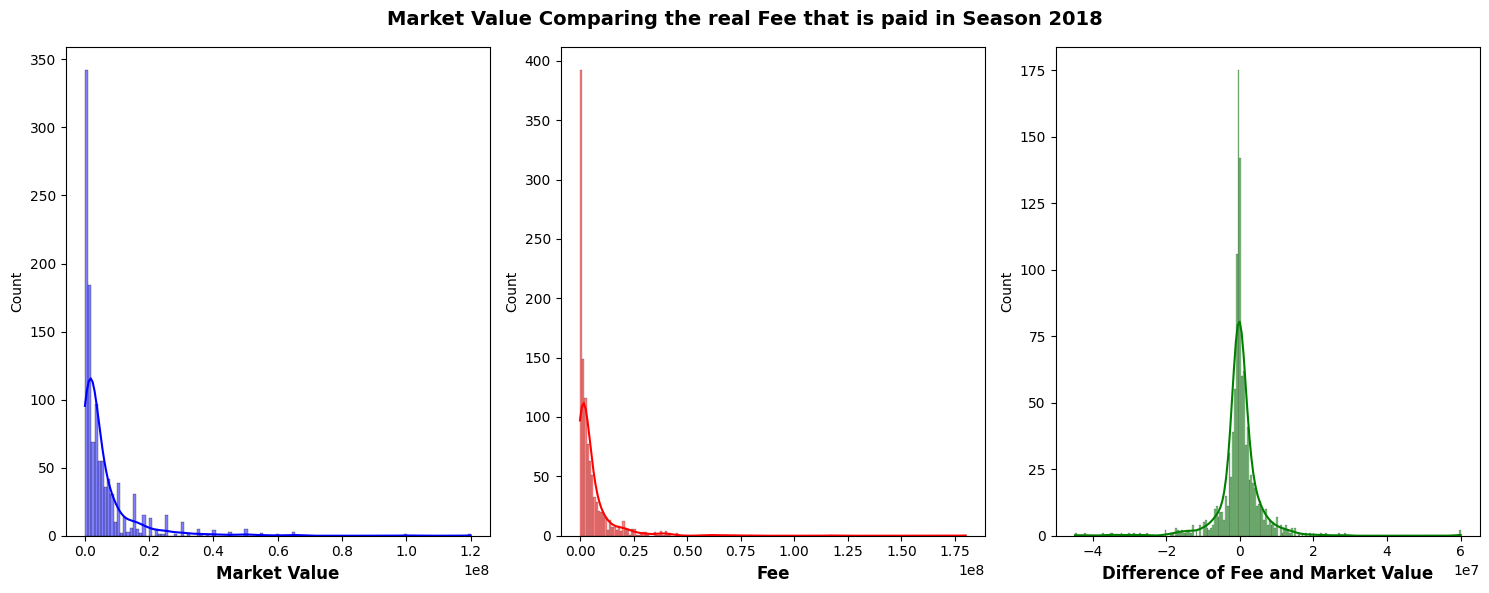

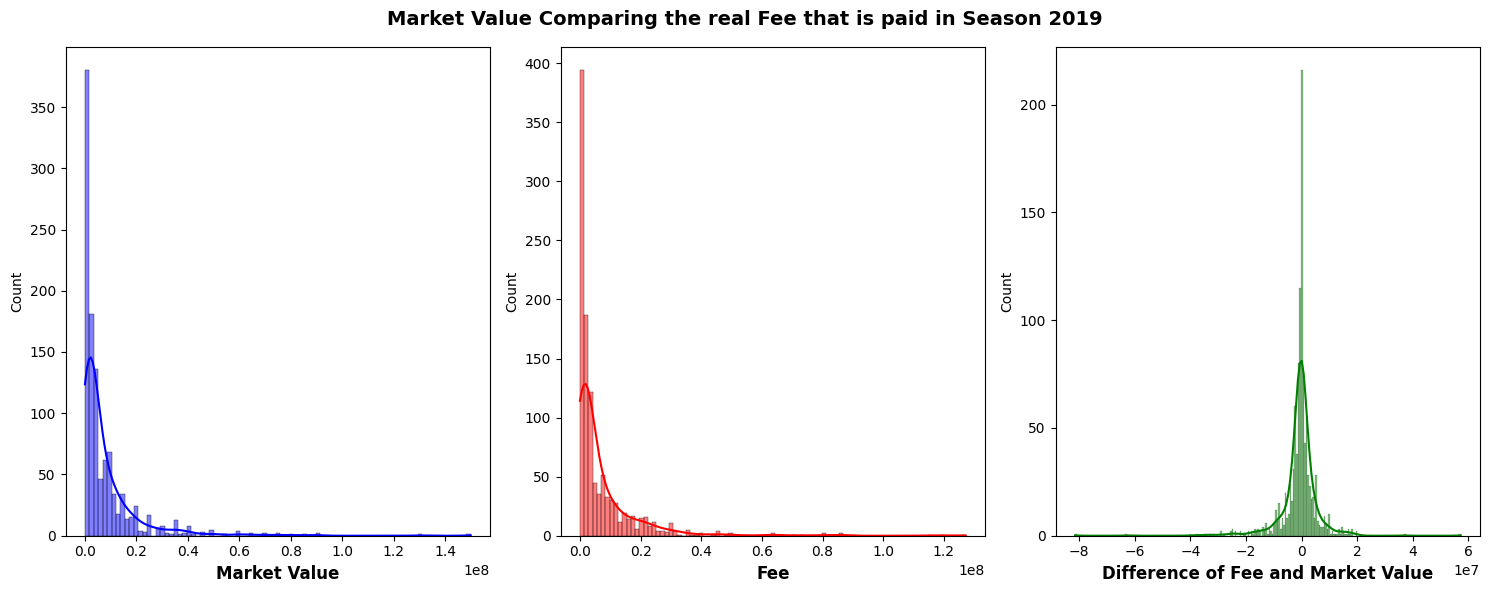

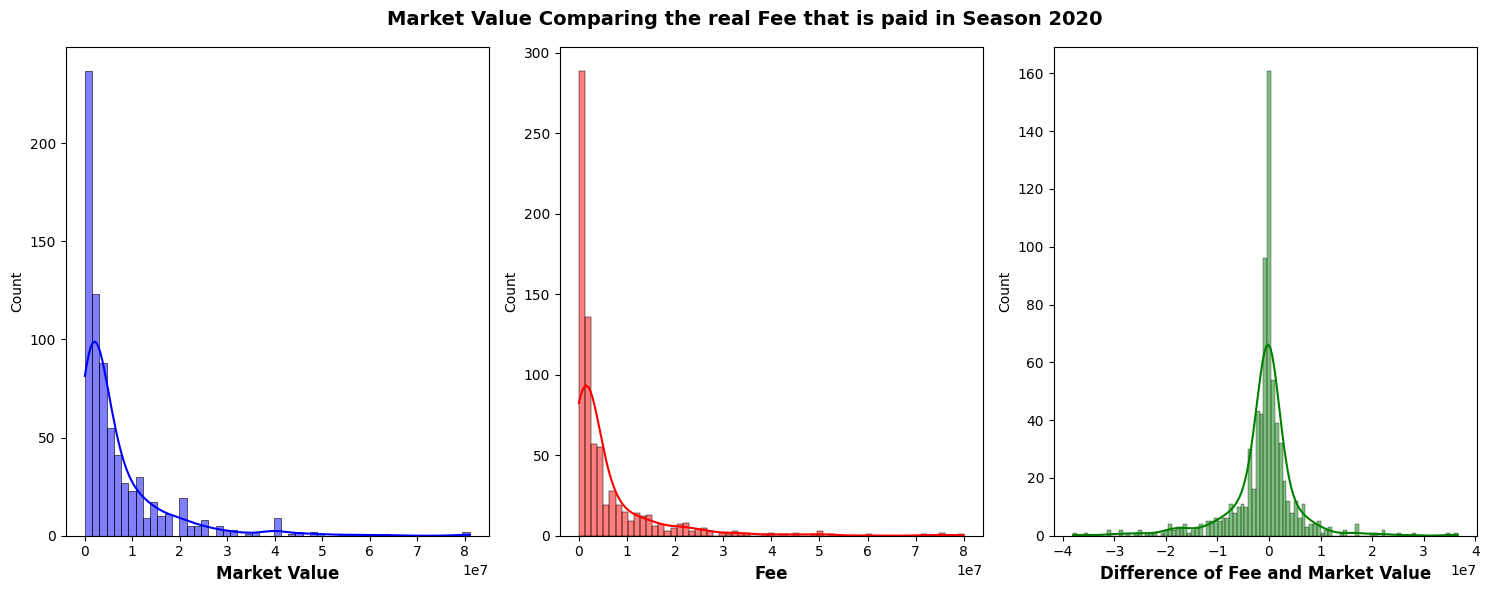

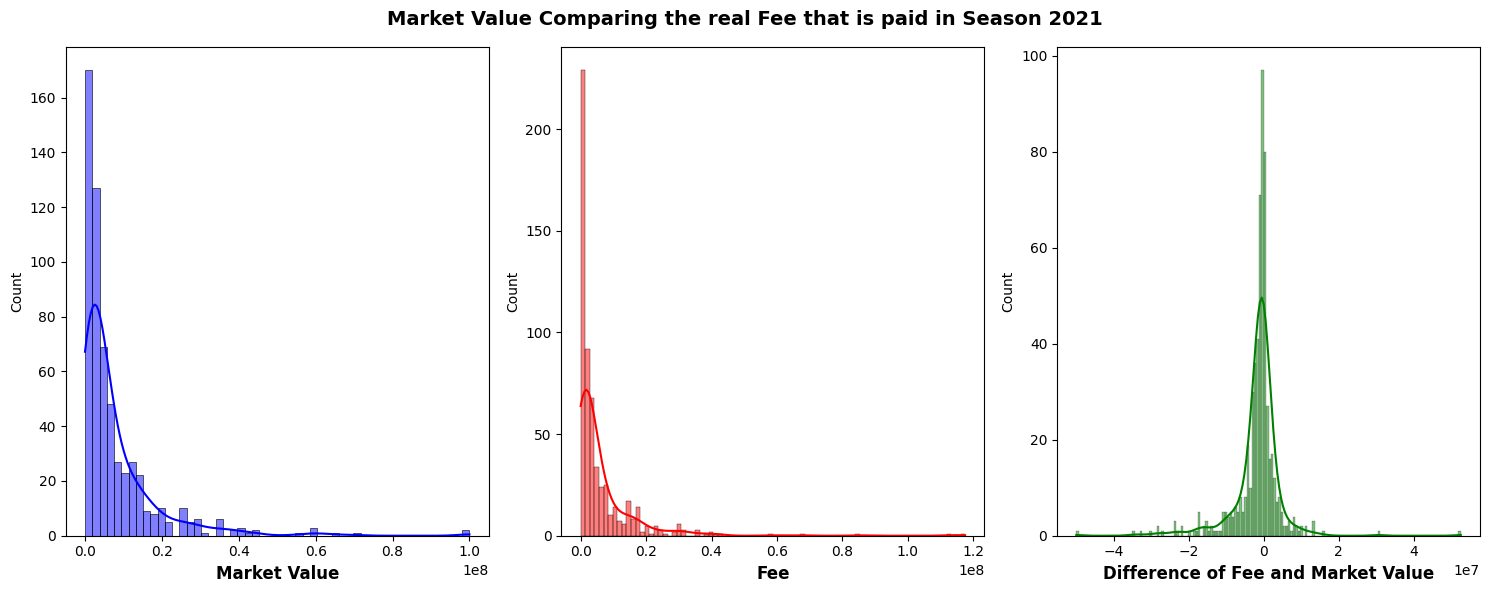

In [18]:
for i in ["17", "18", "19", "20", "21"]:
    transfer_season = players_transfers[players_transfers["season"].str.startswith(i)].copy()
    transfer_season["mv_fee_diff"] = transfer_season["fee"] - transfer_season["mv"]
    fig, axes = plt.subplots(ncols = 3, figsize = (15, 6))
    sns.histplot(transfer_season["mv"], kde = True, color = "blue", ax = axes[0])
    axes[0].set_xlabel("Market Value", fontweight = "bold", fontsize = 12)
    sns.histplot(transfer_season["fee"], kde = True, color  = "red", ax = axes[1])
    axes[1].set_xlabel("Fee", fontweight = "bold", fontsize = 12)
    sns.histplot(transfer_season["mv_fee_diff"], kde = True, color = "green")
    axes[2].set_xlabel("Difference of Fee and Market Value", fontweight = "bold", fontsize = 12)
    fig.suptitle(f"Market Value Comparing the real Fee that is paid in Season 20{i}", fontweight = "bold", fontsize = 14)
    plt.tight_layout()
    plt.show()

درخواست بازیکنان 🍔

In [19]:
#Getting DataFrame ready

all_players_stats = players_stats.copy()
players_2021 = club_players[club_players["Season"] == 2021]
players_requests = pd.merge(players_2021, all_players_stats, left_on = "PlayerID", right_on = "id")
players_requests["minutes_played"] = players_requests["minutes_played"].str.replace("[.'']", "", regex = True)
players_requests.replace({"-" : 0, np.nan : 0}, inplace = True)
players_requests.drop(columns = ["Unnamed: 0", "id", "name", "ClubID", "Season"], inplace = True)
players_requests["goals"] = players_requests["goals"].astype(int)
players_requests["minutes_played"] = players_requests["minutes_played"].astype(int)
players_requests["goals_per_minute"] = (players_requests["minutes_played"] / players_requests["goals"]).round(2)
players_requests.replace([np.inf, -np.inf, np.nan], 0, inplace = True)
columns_change_type = ["appearances", "goals", "asists", "yellow_cards", "second_yellow_cards", "red_cards", "minutes_played", "goals_conceded", "clean_sheets"]
players_requests[columns_change_type] = players_requests[columns_change_type].astype(float).astype(int)
players_requests.rename(columns = {"id":"PlayerID"}, inplace= True)

#Divide players base on their position

football_defender = players_requests[players_requests["Player_possition"].isin(["Centre-Back", "Left-Back", "Right-Back"])]
football_goalkeeper = players_requests[players_requests["Player_possition"].isin(["Goalkeeper"])]
football_striker = players_requests[players_requests["Player_possition"].isin(["Centre-Forward", "Right Winger", "Left Winger", "Second Striker"])]
football_midfielder = players_requests[players_requests["Player_possition"].isin(["Left Midfield", "Right Midfield", "Central Midfield", "Defensive Midfield", "Attacking Midfield"])]

#Get football_goalkeeper DataFrame ready

football_goalkeeper = football_goalkeeper.copy()
football_goalkeeper.loc[:, "goals_conceded_per_minute"] = (football_goalkeeper["minutes_played"] / football_goalkeeper["goals_conceded"]).round(2)
football_goalkeeper.replace([np.inf, -np.inf, np.nan], 0, inplace = True)

#Convert Market Value to correct form 

players_requests["Player_MarketValue"] = players_requests["Player_MarketValue"].replace("\xa0", np.nan)
players_requests = players_requests.dropna(subset = ["Player_MarketValue"])

player_market_values_list = players_requests["Player_MarketValue"].tolist()
player_market_values_list = [value.replace("\xa0", "").replace("€", "") for value in player_market_values_list]
final_list = []
for i in range(len(player_market_values_list)):
    if player_market_values_list[i] == "":
        final_list += [""]
    elif player_market_values_list[i] == np.nan:
        final_list += [np.nan]
    else:
        if (player_market_values_list[i][-1]) == "m":
            final_list += [float(player_market_values_list[i].replace("m", "")) * 1000000]
        elif (player_market_values_list[i][-1]) == "b":
            final_list += [float(player_market_values_list[i].replace("b", "")) * 1000000000]
        elif (player_market_values_list[i][-1]) == "k":
            final_list += [float(player_market_values_list[i].replace("k", "")) * 1000]
players_requests["Player_MarketValue"] = final_list
players_requests["Player_MarketValue"] = players_requests["Player_MarketValue"].astype(int)

In [20]:
#club_players_2021

club_players_2021 = club_players[club_players["Season"] == 2021]
goalkeeper = pd.merge(football_goalkeeper, club_players_2021, on = ["PlayerID"], how = "inner").drop_duplicates()
 
#MERGE TABLES "football_defender" AND "club_players"

defender = pd.merge(football_defender, club_players_2021, on = ["PlayerID", "Player_possition"]).drop_duplicates()
defender.drop(["goals_conceded", "clean_sheets"], axis = 1)

#MERGE TABLES "football_midfielder" AND "club_players"

midfielder = pd.merge(football_midfielder, club_players_2021, on=["PlayerID", "Player_possition"]).drop_duplicates()
midfielder.drop(["goals_conceded", "clean_sheets"], axis = 1)

#MERGE TABLES "football_striker" AND "club_players"

striker = pd.merge(football_striker, club_players_2021, on = ["PlayerID", "Player_possition"]).drop_duplicates()
striker.drop(["goals_conceded", "clean_sheets"], axis = 1)

#club_name_Season_2021

clubs_2021 = club[club["Season"] == 2021]

#Defensive performance of the team
goalkeeper_team = goalkeeper.copy()
goalkeeper_team = goalkeeper_team[["ClubID" ,"goals_conceded", "clean_sheets"]]
goalkeeper_team = goalkeeper_team.groupby("ClubID").sum(["goals_conceded", "clean_sheets"])

Defensive_performance = pd.merge(clubs_2021, goalkeeper_team, on = "ClubID")
Defensive_performance = Defensive_performance[["Club", "goals_conceded", "clean_sheets"]]
Defensive_performance = Defensive_performance.sort_values(by = ["goals_conceded", "clean_sheets"], ascending = True).reset_index(drop = True)

striker_team = striker.copy()
striker_team = striker_team[["ClubID" , "goals" , "asists"]]
striker_team = striker_team.groupby("ClubID").sum(["goals", "asists"])

Offensive_performance = pd.merge(clubs_2021, striker_team, on = "ClubID")
Offensive_performance = Offensive_performance[["Club", "goals", "asists", "Rank", "League"]]
Offensive_performance = Offensive_performance.sort_values(by = ["goals", "asists"], ascending = False).reset_index(drop = True)

Comparison = pd.merge( Defensive_performance, Offensive_performance, on = "Club" )
Comparison["performance"] = (Comparison["goals"] / Comparison["goals_conceded"]).round(2)
Comparison.sort_values(by = ["performance"], ascending = True).reset_index(drop = True)

#final_Comparison

final_Comparison = Comparison.copy()
final_Comparison = final_Comparison[["Club", "goals_conceded", "goals", "performance"]]
final_Comparison = final_Comparison.sort_values(["performance", "goals", "goals_conceded"],ascending = [True, True, True]).reset_index(drop = True)
display(final_Comparison)

,Club,goals_conceded,goals,performance
0,Arminia Bielefeld,102,17,0.17
1,Wolverhampton Wanderers,173,33,0.19
2,FC Empoli,150,33,0.22
3,SpVgg Greuther Fürth,145,33,0.23
4,Atalanta BC,197,55,0.28
...,...,...,...,...
93,Bayern Munich,95,144,1.52
94,Crystal Palace,56,90,1.61
95,Tottenham Hotspur,58,96,1.66
96,Bayer 04 Leverkusen,66,110,1.67


درخواست مربی 🍟

In [21]:
#Getting DataFrame of all players 2021

players_2021 = club_players[club_players["Season"] == 2021]
players_requests = pd.merge(players_2021, players_stats, left_on = "PlayerID", right_on = "id")
players_requests["minutes_played"] = players_requests["minutes_played"].str.replace("[.'']", "", regex = True)
players_requests.replace({"-" : 0, np.nan : 0}, inplace = True)
players_requests.drop(columns = ["Unnamed: 0", "id", "name", "ClubID", "Season"], inplace = True)
players_requests["goals"] = players_requests["goals"].astype(int)
players_requests["minutes_played"] = players_requests["minutes_played"].astype(int)
players_requests["goals_per_minute"] = (players_requests["minutes_played"] / players_requests["goals"]).round(2)
players_requests.replace([np.inf, -np.inf, np.nan], 0, inplace = True)
columns_change_type = ["appearances", "goals", "asists", "yellow_cards", "second_yellow_cards", "red_cards", "minutes_played", "goals_conceded", "clean_sheets"]
players_requests[columns_change_type] = players_requests[columns_change_type].astype(float).astype(int)
coaches_requests = players_requests.copy()
coaches_requests["Player_MarketValue"] = coaches_requests["Player_MarketValue"].replace("\xa0", np.nan)
coaches_requests = coaches_requests.dropna(subset = ["Player_MarketValue"])

#Convert Market Value to correct form 

player_market_values_list = coaches_requests["Player_MarketValue"].tolist()
player_market_values_list = [value.replace("\xa0", "").replace("€", "") for value in player_market_values_list]
final_list = []
for i in range(len(player_market_values_list)):
    if player_market_values_list[i] == "":
        final_list += [""]
    elif player_market_values_list[i] == np.nan:
        final_list += [np.nan]
    else:
        if (player_market_values_list[i][-1]) == "m":
            final_list += [float(player_market_values_list[i].replace("m", "")) * 1000000]
        elif (player_market_values_list[i][-1]) == "b":
            final_list += [float(player_market_values_list[i].replace("b", "")) * 1000000000]
        elif (player_market_values_list[i][-1]) == "k":
            final_list += [float(player_market_values_list[i].replace("k", "")) * 1000]

coaches_requests["Player_MarketValue"] = final_list
coaches_requests["Player_MarketValue"] = coaches_requests["Player_MarketValue"].astype(int)

In [22]:
#players in the bottom 40% in terms of price

bottom_40_percent = coaches_requests[coaches_requests["Player_MarketValue"] <= coaches_requests["Player_MarketValue"].quantile(0.4)]
bottom_40_percent = bottom_40_percent.sort_values(by = ["Player_MarketValue"], ascending = True)
display(bottom_40_percent)

,League,Player_name,PlayerID,Player_MarketValue,Player_possition,appearances,goals,asists,yellow_cards,second_yellow_cards,red_cards,minutes_played,goals_conceded,clean_sheets,goals_per_minute
2338,Serie A,Lorenzo Cannavale,622029,10000,Centre-Forward,16,6,0,1,0,0,968,0,0,161.33
1914,Serie A,Lado Akhalaia,706380,25000,Centre-Forward,33,6,3,4,0,1,2031,0,0,338.50
2213,Serie A,Riccardo Pigozzo,529833,25000,Goalkeeper,0,0,0,0,0,0,0,0,0,0.00
1964,Serie A,Nicola Borghetto,415801,25000,Goalkeeper,6,0,0,1,0,0,506,4,2,0.00
1348,Bundesliga,Matthias Köbbing,227089,25000,Goalkeeper,0,0,0,0,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,Ligue 1,Jean-Philippe Krasso,358515,1800000,Centre-Forward,33,5,3,4,0,0,1710,0,0,342.00
2138,Serie A,Ardian Ismajli,435228,1800000,Centre-Back,22,0,0,7,0,0,1391,0,0,0.00
3495,LaLiga,Fernando Calero,357884,1800000,Centre-Back,18,0,0,4,0,0,1264,0,0,0.00
2097,Serie A,Alex Ferrari,197491,1800000,Centre-Back,24,1,0,4,0,0,1740,0,0,1740.00


In [23]:
#Divide players base on their position

football_defender_2 = coaches_requests[coaches_requests["Player_possition"].isin(["Centre-Back", "Left-Back", "Right-Back"])]
football_goalkeeper_2 = coaches_requests[coaches_requests["Player_possition"].isin(["Goalkeeper"])]
football_striker_2 = coaches_requests[coaches_requests["Player_possition"].isin(["Centre-Forward", "Right Winger", "Left Winger", "Second Striker"])]
football_midfielder_2 = coaches_requests[coaches_requests["Player_possition"].isin(["Left Midfield", "Right Midfield", "Central Midfield", "Defensive Midfield", "Attacking Midfield"])]

#Get football_goalkeeper DataFrame ready

football_goalkeeper_2 = football_goalkeeper_2.copy()
football_goalkeeper_2.loc[:, "goals_conceded_per_minute"] = (football_goalkeeper_2["minutes_played"] / football_goalkeeper_2["goals_conceded"]).round(2)
football_goalkeeper_2.replace([np.inf, -np.inf, np.nan], 0, inplace = True)

In [24]:
#Goalkeepers_performance

football_goalkeeper_per = football_goalkeeper_2.dropna(subset = ["Player_MarketValue"])
football_goalkeeper_per = football_goalkeeper_per[["Player_name", "goals_conceded_per_minute", "clean_sheets", "appearances", "minutes_played"]]
football_goalkeeper_per["normalized_gcpm"] = football_goalkeeper_per["goals_conceded_per_minute"] / football_goalkeeper_per["minutes_played"]
football_goalkeeper_per["normalized_csp"] = (football_goalkeeper_per["clean_sheets"] * football_goalkeeper_per["minutes_played"]) 
football_goalkeeper_per["weighted_average"] = (0.5 * football_goalkeeper_per["normalized_gcpm"] + 0.3 * football_goalkeeper_per["normalized_csp"] + 0.2 * football_goalkeeper_per["appearances"]).round(2)
football_goalkeeper_per = football_goalkeeper_per[["Player_name", "weighted_average"]]
football_goalkeeper_per = football_goalkeeper_per.dropna(subset = ["weighted_average"])
football_goalkeeper_per.drop_duplicates(inplace = True)
high_30_percent_goalkeeper =  football_goalkeeper_per[football_goalkeeper_per["weighted_average"] >= football_goalkeeper_per["weighted_average"].quantile(0.7)]
high_30_percent_goalkeeper = high_30_percent_goalkeeper.sort_values("weighted_average", ascending = False)
display(high_30_percent_goalkeeper)

#defender_performance

football_defenderr_per = football_defender_2.dropna(subset = ["Player_MarketValue"])
football_defenderr_per["cards"] = football_defenderr_per["yellow_cards"] + football_defenderr_per["second_yellow_cards"] + football_defenderr_per["red_cards"]
football_defenderr_per = football_defenderr_per[["Player_name", "goals", "asists", "cards", "minutes_played", "appearances", "goals_per_minute"]]
football_defenderr_per["weighted_average"] = ((football_defenderr_per["minutes_played"] / football_defenderr_per["appearances"]) * 0.5 + ((football_defenderr_per["goals"] + football_defenderr_per["asists"])) * 0.3 - (football_defenderr_per["cards"] / football_defenderr_per["appearances"]) * 0.2).round(2)
football_defenderr_per = football_defenderr_per[["Player_name", "weighted_average"]]
football_defenderr_per = football_defenderr_per.dropna(subset = ["weighted_average"])
football_defenderr_per.drop_duplicates(inplace = True)
high_30_percent_defenderr =  football_defenderr_per[football_defenderr_per["weighted_average"] >= football_defenderr_per["weighted_average"].quantile(0.7)] 
high_30_percent_defenderr = high_30_percent_defenderr.sort_values("weighted_average", ascending = False)
display(high_30_percent_defenderr)

#midfielder_performance

football_midfielder_per = football_midfielder_2.dropna(subset = ["Player_MarketValue"])
football_midfielder_per["cards"] = football_midfielder_per["yellow_cards"] + football_midfielder_per["second_yellow_cards"] + football_midfielder_per["red_cards"]
football_midfielder_per = football_midfielder_per[["Player_name", "goals", "asists", "cards", "minutes_played", "appearances", "goals_per_minute"]]
football_midfielder_per["weighted_average"] = ((football_midfielder_per["appearances"]/football_midfielder_per["minutes_played"] ) * 0.4 + ( football_midfielder_per["asists"]) * 0.4 + football_midfielder_per["goals"] * 0.2).round(2)
football_midfielder_per = football_midfielder_per[["Player_name", "weighted_average"]]
football_midfielder_per = football_midfielder_per.dropna(subset = ["weighted_average"])
football_midfielder_per.drop_duplicates(inplace = True)
high_30_percent_midfielder =  football_midfielder_per[football_midfielder_per["weighted_average"] >= football_midfielder_per["weighted_average"].quantile(0.7)] 
high_30_percent_midfielder = high_30_percent_midfielder.sort_values("weighted_average", ascending = False)
display(high_30_percent_midfielder)

#striker_performance

football_striker_per = football_striker_2.dropna(subset = ["Player_MarketValue"])
football_striker_per["cards"] = football_striker_per["yellow_cards"] + football_striker_per["second_yellow_cards"] + football_striker_per["red_cards"]
football_striker_per = football_striker_per[["Player_name", "goals_per_minute", "goals", "asists", "minutes_played", "appearances"]]
football_striker_per["weighted_average"] = football_striker_per["goals"] + football_striker_per["asists"]
football_striker_per = football_striker_per[["Player_name", "weighted_average"]]
football_striker_per = football_striker_per.dropna(subset = ["weighted_average"])
football_striker_per.drop_duplicates(inplace = True)
high_30_percent_striker =  football_striker_per[football_striker_per["weighted_average"] >= football_striker_per["weighted_average"].quantile(0.7)] 
high_30_percent_striker = high_30_percent_striker.sort_values("weighted_average", ascending = False)
display(high_30_percent_striker)

,Player_name,weighted_average
41,Alisson,39619.81
3527,Matías Dituro,35408.41
0,Ederson,33182.31
1710,Rui Patrício,32086.81
3103,Thibaut Courtois,31492.41
...,...,...
1591,Sebastiano Desplanches,4453.41
1831,Samuele Vitale,4414.62
1225,Alexander Schwolow,4408.41
142,Matej Kovar,4372.23


,Player_name,weighted_average
62,Trent Alexander-Arnold,51.28
1162,Christian Günter,49.70
95,Antonio Rüdiger,49.10
3150,Jordi Alba,48.68
16,João Cancelo,48.30
...,...,...
3195,Daniel Wass,42.08
2890,Jean-Kévin Duverne,42.07
1975,Diego Coppola,42.07
2268,Kelvin Amian,42.05


,Player_name,weighted_average
920,Marco Reus,9.80
26,Kevin De Bruyne,9.41
126,Mason Mount,9.01
2527,Benjamin Bourigeaud,8.80
321,James Maddison,8.41
...,...,...
2898,Romain Philippoteaux,1.81
2786,Danylo Ignatenko,1.81
2744,Dany Jean,1.81
2234,Damiano Pecile,1.81


,Player_name,weighted_average
2377,Kylian Mbappé,65
3133,Karim Benzema,59
882,Robert Lewandowski,57
962,Christopher Nkunku,55
83,Mohamed Salah,47
...,...,...
3059,Terem Moffi,12
3065,Pablo Pagis,12
2040,Isaac Success,12
377,Keinan Davis,12


Part One 🕐

,Player_name
0,Matías Dituro
1,Bailey Peacock-Farrell
2,Christian Walton
3,Alberto Brignoli
4,Franco Israel
...,...
300,Afimico Pululu
301,Nikola Kalinic
302,Burak Yilmaz
303,Danel Sinani


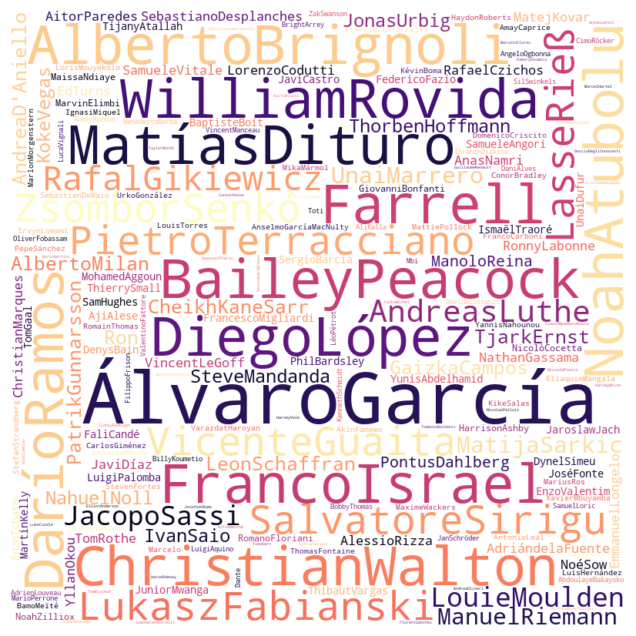

In [25]:
bottom_40_names = list(bottom_40_percent["Player_name"])
goalkeeper_names = list(high_30_percent_goalkeeper["Player_name"])
defender_names = list(high_30_percent_defenderr["Player_name"])
midfielder_names = list(high_30_percent_midfielder["Player_name"])
striker_names = list(high_30_percent_striker["Player_name"])
intersection_list = []
for i in [goalkeeper_names, defender_names, midfielder_names, striker_names]:
    for j in i:
        if j in bottom_40_names:
            intersection_list += [j]
intersection_df = pd.DataFrame({"Player_name" : intersection_list})
display(intersection_df)

#WordCloud
text = ""
for i in intersection_list:
    text += i.replace(" ", "")
    text += " "

wc = WordCloud(width = 800, height = 800, background_color = "white", colormap = "magma")
wc.generate(text)
plt.figure(figsize = (8, 8))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

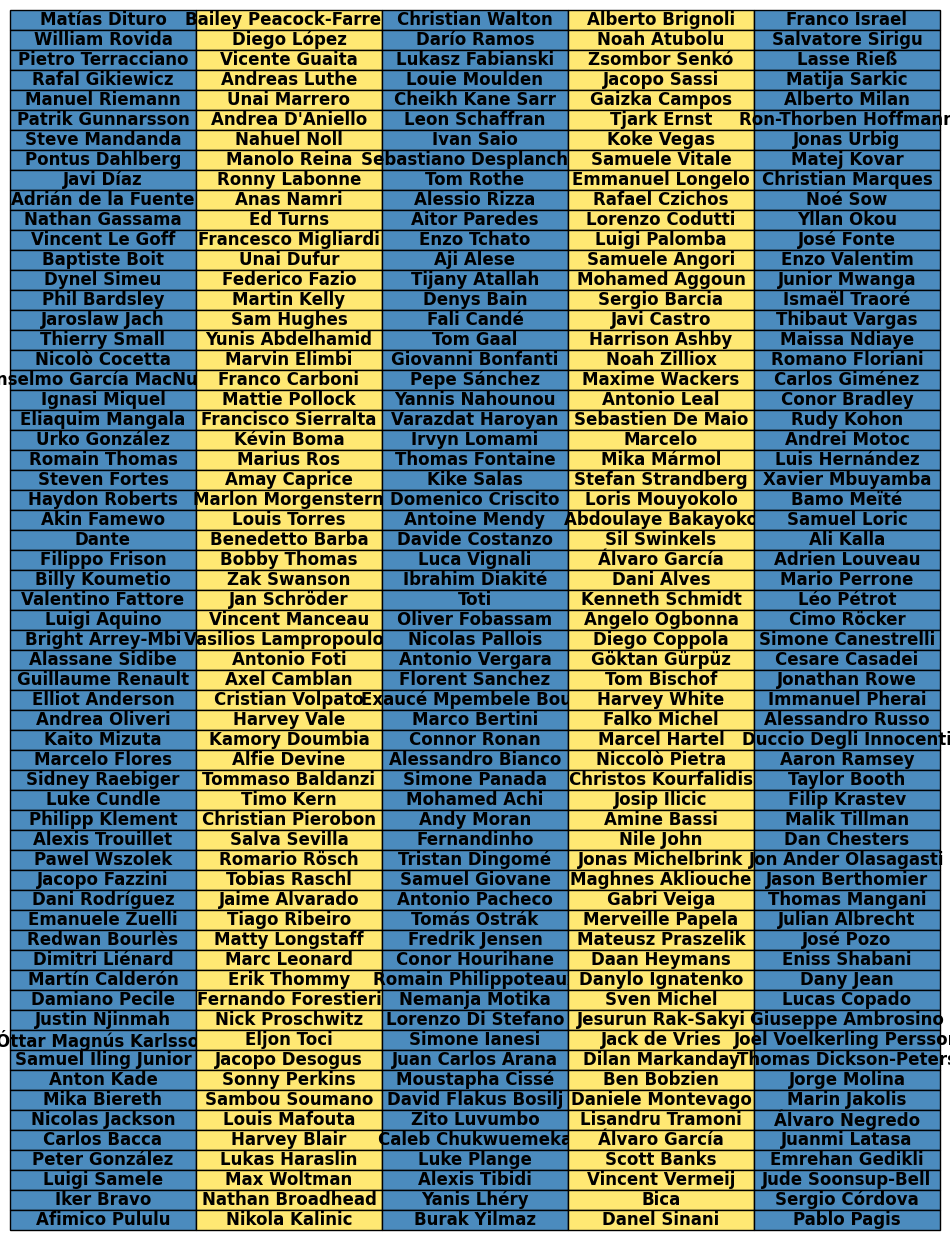

In [26]:
#table

num_columns = 5 
num_rows = -(-len(intersection_list) // num_columns)
fig, ax = plt.subplots(figsize = (10, 8))
ax.axis("off")
table_data = [intersection_list[i:i+num_columns] for i in range(0, len(intersection_list), num_columns)]
table = ax.table(cellText = table_data, cellLoc = "center", loc = "center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
colors = ["#4B8BBE", "#FFE873"]
row_idx = 0
col_idx = 0
for key, cell in table.get_celld().items():
    cell.get_text().set_fontweight("bold")
    if row_idx % 2 == 0:
        cell.set_facecolor(colors[col_idx % 2])
    else:
        cell.set_facecolor(colors[(col_idx + 1) % 2])
    col_idx += 1
    if col_idx % num_columns == 0:
        row_idx += 1
plt.show()

Part Two 🕑

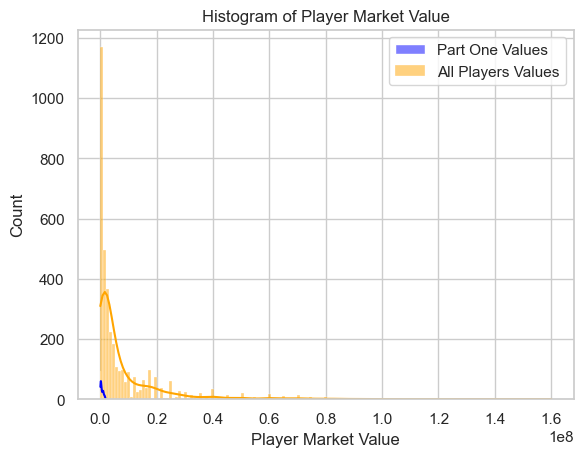

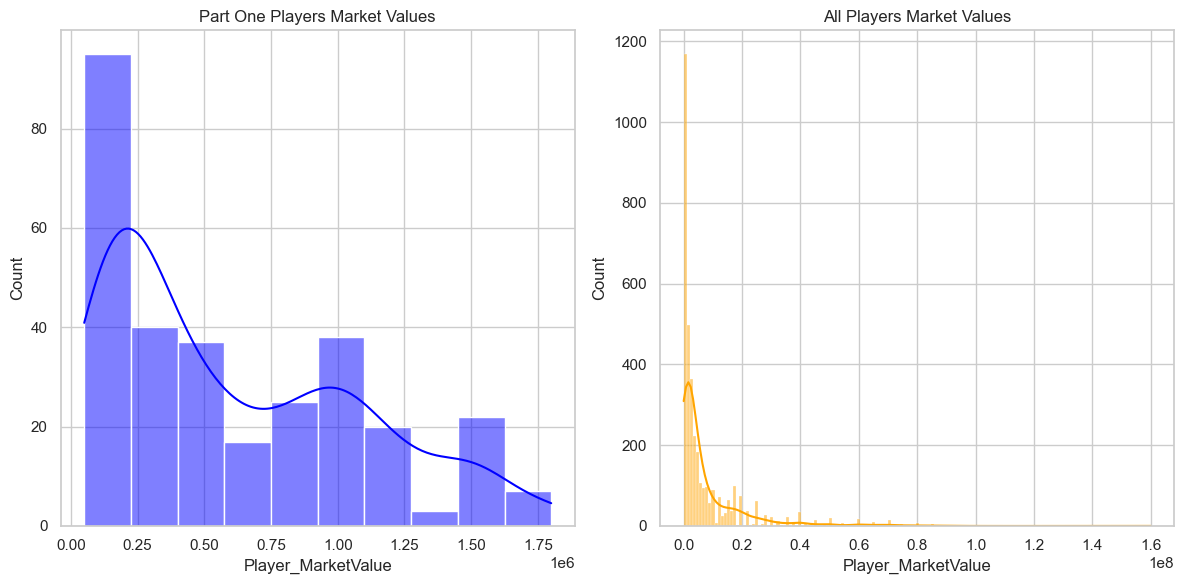

In [27]:
part_one_values = (intersection_df.merge(coaches_requests, on = "Player_name", how = "inner")).drop_duplicates(subset = "Player_name")
part_one_values = part_one_values[["Player_name", "Player_MarketValue"]]

sns.set(style = "whitegrid")
sns.histplot(data = part_one_values, x = "Player_MarketValue", kde = True, color = "blue", label = "Part One Values")
sns.histplot(data = coaches_requests, x = "Player_MarketValue", kde = True, color = "orange", label = "All Players Values")
plt.title("Histogram of Player Market Value")
plt.xlabel("Player Market Value")
plt.ylabel("Count")
plt.legend()
plt.show()

fig, axes = plt.subplots(1, 2, figsize = (12, 6))
sns.histplot(data = part_one_values, x = "Player_MarketValue", kde = True, ax = axes[0], color = "blue")
axes[0].set_title("Part One Players Market Values")
sns.histplot(data = coaches_requests, x = "Player_MarketValue", kde = True, ax = axes[1], color = "orange")
axes[1].set_title("All Players Market Values")
plt.tight_layout()
plt.show()

Part Three 🕒

,Player_name,weighted_average,Player_possition,Player_MarketValue
239,Sergio Córdova,9.00,Centre-Forward,1000000
64,Pablo Pagis,9.00,Centre-Forward,200000
202,Nikola Kalinic,9.00,Centre-Forward,800000
304,Erik Thommy,9.00,Attacking Midfield,1800000
117,Bica,9.00,Centre-Forward,300000
...,...,...,...,...
265,Tom Rothe,3.94,Left-Back,1200000
209,Fernando Forestieri,3.72,Second Striker,875000
57,Ronny Labonne,3.34,Right-Back,150000
241,Alassane Sidibe,2.74,Central Midfield,1000000


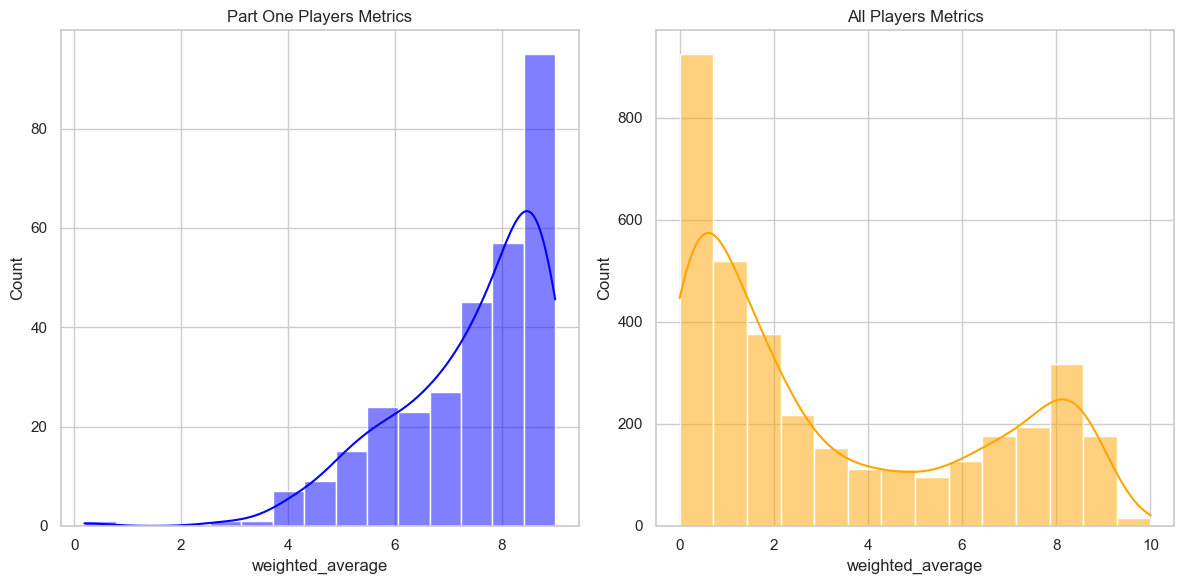

In [28]:
for i in [high_30_percent_goalkeeper, high_30_percent_defenderr, high_30_percent_midfielder, high_30_percent_striker]:
    min_val = i["weighted_average"].min()
    max_val = i["weighted_average"].max()
    scaled_values = 9 - (((i["weighted_average"] - min_val) / (max_val - min_val)) * 10).round(2)
    i["weighted_average"] = scaled_values
combined_df_part_one = (pd.concat([high_30_percent_goalkeeper, high_30_percent_defenderr, high_30_percent_midfielder, high_30_percent_striker])).reset_index(drop = True)
combined_df_part_one = (pd.merge(bottom_40_percent, combined_df_part_one, on = "Player_name", how = "inner")).drop_duplicates()
combined_df_part_one = combined_df_part_one[["Player_name", "weighted_average", "Player_possition", "Player_MarketValue"]]
combined_df_part_one = combined_df_part_one.sort_values("weighted_average", ascending = False)
display(combined_df_part_one)

for i in [football_goalkeeper_per, football_defenderr_per, football_midfielder_per, football_striker_per]:
    min_val = i["weighted_average"].min()
    max_val = i["weighted_average"].max()
    scaled_values = (((i["weighted_average"] - min_val) / (max_val - min_val)) * 10).round(2)
    i["weighted_average"] = scaled_values
combined_df_all = (pd.concat([football_goalkeeper_per, football_defenderr_per, football_midfielder_per, football_striker_per])).reset_index(drop = True)
combined_df_all = (pd.merge(combined_df_all, coaches_requests, on = "Player_name", how = "inner")).drop_duplicates()
combined_df_all = combined_df_all[["Player_name", "weighted_average", "Player_possition", "Player_MarketValue"]]

fig, axes = plt.subplots(1, 2, figsize = (12, 6))
sns.histplot(data = combined_df_part_one, x = "weighted_average", kde = True, ax = axes[0], color = "blue")
axes[0].set_title("Part One Players Metrics")
sns.histplot(data = combined_df_all, x = "weighted_average", kde = True, ax = axes[1], color = "orange")
axes[1].set_title("All Players Metrics")
plt.tight_layout()
plt.show()

Part Four 🕓

,Player_possition,Count,count_part_one
0,Attacking Midfield,216,32
1,Central Midfield,468,38
2,Centre-Back,614,88
3,Centre-Forward,492,38
4,Defensive Midfield,275,7
5,Goalkeeper,373,41
6,Left Midfield,22,4
7,Left Winger,224,8
8,Left-Back,258,12
9,Right Midfield,29,5


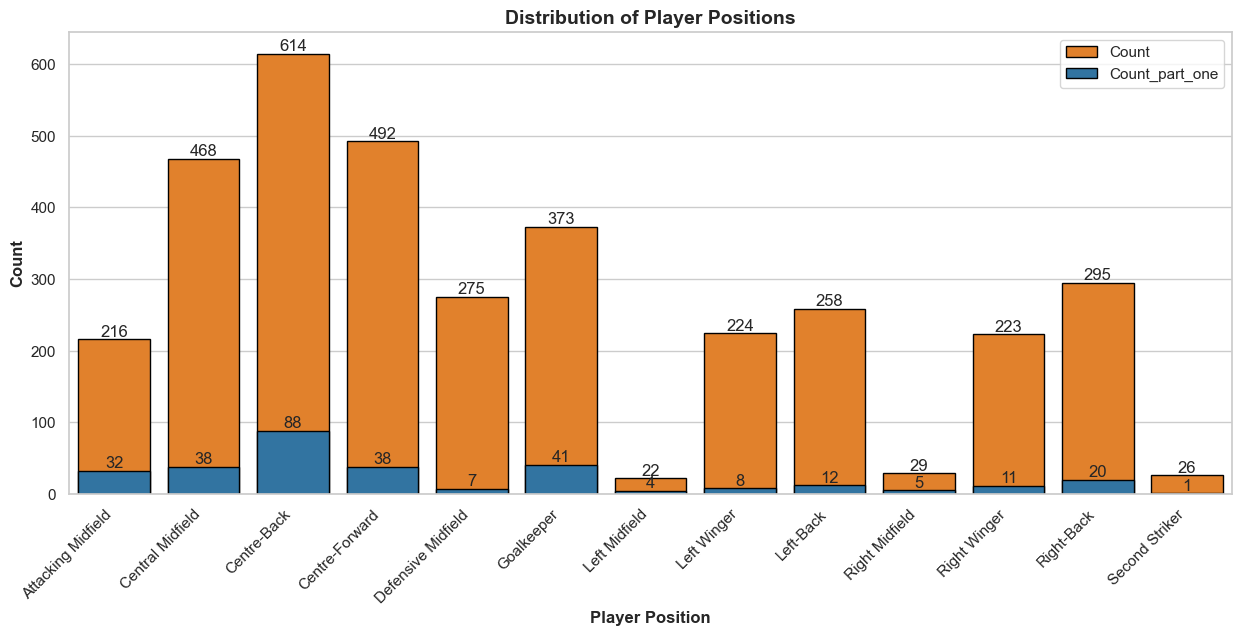

In [29]:
pos_req_old = combined_df_part_one.groupby("Player_possition").size().reset_index(name = "Count")
count_list = pos_req_old["Count"].tolist()
pos_req_new = combined_df_all.groupby("Player_possition").size().reset_index(name = "Count")
pos_req_new["count_part_one"] = list(count_list)
display(pos_req_new)

sns.set(style = "whitegrid")
fig, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "Player_possition", y = "Count", data = pos_req_new, ax = ax, color = "#ff7f0e", label = "Count", edgecolor = "black")
sns.barplot(x = "Player_possition", y = "count_part_one", data = pos_req_new, ax = ax, color = "#1f77b4", label = "Count_part_one", edgecolor = "black")
ax.set_xlabel("Player Position", fontsize = 12, weight = "bold")
ax.set_ylabel("Count", fontsize = 12, weight = "bold")
ax.set_title("Distribution of Player Positions", fontsize = 14, weight = "bold")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right")
ax.legend()
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height, f"{height:.0f}", ha = "center", va = "bottom")
plt.show()

Part Five 🕔

In [30]:
combined_df_all = combined_df_all.sort_values("weighted_average", ascending = False)
display(combined_df_all)

remove_worst = combined_df_all[combined_df_all["weighted_average"] >= combined_df_all["weighted_average"].quantile(0.25)]
display(remove_worst)

removed_players = combined_df_all[combined_df_all["weighted_average"] < combined_df_all["weighted_average"].quantile(0.25)]
display(removed_players)

,Player_name,weighted_average,Player_possition,Player_MarketValue
3,Alisson,10.00,Goalkeeper,50000000
1812,Marco Reus,10.00,Attacking Midfield,11000000
403,Trent Alexander-Arnold,10.00,Right-Back,80000000
3208,Kylian Mbappé,10.00,Centre-Forward,160000000
736,Christian Günter,9.69,Left-Back,12000000
...,...,...,...,...
2913,Silas,0.00,Right Winger,15000000
198,Nicola Ravaglia,0.00,Goalkeeper,200000
194,Simone Aresti,0.00,Goalkeeper,100000
2890,Enrique Herrero,0.00,Centre-Forward,300000


,Player_name,weighted_average,Player_possition,Player_MarketValue
3,Alisson,10.00,Goalkeeper,50000000
1812,Marco Reus,10.00,Attacking Midfield,11000000
403,Trent Alexander-Arnold,10.00,Right-Back,80000000
3208,Kylian Mbappé,10.00,Centre-Forward,160000000
736,Christian Günter,9.69,Left-Back,12000000
...,...,...,...,...
2720,Fábio Silva,0.62,Centre-Forward,15000000
2714,Trincão,0.62,Right Winger,20000000
2164,Valerio Verre,0.62,Attacking Midfield,2500000
3513,Nico Williams,0.62,Right Winger,12000000


,Player_name,weighted_average,Player_possition,Player_MarketValue
54,Ellery Balcombe,0.61,Goalkeeper,300000
1606,Danny Drinkwater,0.61,Central Midfield,1200000
218,Vid Belec,0.61,Goalkeeper,500000
2340,Joris Chotard,0.61,Defensive Midfield,10000000
282,Grégoire Coudert,0.61,Goalkeeper,200000
...,...,...,...,...
2913,Silas,0.00,Right Winger,15000000
198,Nicola Ravaglia,0.00,Goalkeeper,200000
194,Simone Aresti,0.00,Goalkeeper,100000
2890,Enrique Herrero,0.00,Centre-Forward,300000


فرضیه‌ی اول 🥓

In [31]:
player_stats = pd.read_csv("players_stats.csv")
player_stats["minutes_played"] = player_stats["minutes_played"].str.replace(".", "").str.replace("'", "").replace("-", np.nan)
player_stats["minutes_played"] = player_stats["minutes_played"].fillna("0").astype(int)
player_stats["minutes_played"] = player_stats["minutes_played"].astype(int)
player_stats["goals_conceded"] = player_stats["goals_conceded"].str.replace(".", "").str.replace("'", "").replace("-", np.nan)
player_stats["goals_conceded"] = player_stats["goals_conceded"].fillna("0").astype(int)
player_stats["goals_conceded"] = player_stats["goals_conceded"].astype(int)
player_stats["clean_sheets"] = player_stats["clean_sheets"].str.replace(".", "").str.replace("'", "").replace("-", np.nan)
player_stats["clean_sheets"] = player_stats["clean_sheets"].fillna("0").astype(int)
player_stats["clean_sheets"] = player_stats["clean_sheets"].astype(int)
player_stats["appearances"] = player_stats["appearances"].replace("-", np.nan)
player_stats["appearances"] = player_stats["appearances"].fillna("0").astype(float).astype(int)
player_stats["goals"] = player_stats["goals"].replace(".", np.nan).replace("'", "").replace("-", np.nan)
player_stats["goals"] = player_stats["goals"].fillna("0").astype(int)
player_stats["goals"] = player_stats["goals"].astype(int)
player_stats["asists"] = player_stats["asists"].replace(".", np.nan).replace("'", "").replace("-", np.nan)
player_stats["asists"] = player_stats["asists"].fillna("0").astype(int)
player_stats["asists"] = player_stats["asists"].astype(int)
player_stats["yellow_cards"] = player_stats["yellow_cards"].replace(".", np.nan).replace("'", "").replace("-", np.nan)
player_stats["yellow_cards"] = player_stats["yellow_cards"].fillna("0").astype(int)
player_stats["yellow_cards"] = player_stats["yellow_cards"].astype(int)
player_stats["second_yellow_cards"] = player_stats["second_yellow_cards"].replace(".", np.nan).replace("'", "").replace("-", np.nan)
player_stats["second_yellow_cards"] = player_stats["second_yellow_cards"].fillna("0").astype(int)
player_stats["second_yellow_cards"] = player_stats["second_yellow_cards"].astype(int)
player_stats["red_cards"] = player_stats["red_cards"].replace(".", np.nan).replace("'", "").replace("-", np.nan)
player_stats["red_cards"] = player_stats["red_cards"].fillna("0").astype(int)
player_stats["red_cards"] = player_stats["red_cards"].astype(int)
player_stats.rename (columns = {"id" : "PlayerID"}, inplace = True)
player_stats["appearances"] = player_stats["appearances"].replace("-", np.nan)
player_stats["appearances"] = player_stats["appearances"].fillna("0").astype(float).astype(int)
display(player_stats)

,PlayerID,name,appearances,goals,asists,yellow_cards,second_yellow_cards,red_cards,minutes_played,goals_conceded,clean_sheets
0,465955,marcin-bulka,6,0,0,0,0,0,540,3,3
1,2998,robert-huth,0,0,0,0,0,0,0,0,0
2,406633,nya-kirby,22,7,2,4,0,0,1628,0,0
3,81512,christian-kabasele,17,0,0,0,0,0,1276,0,0
4,122980,ali-gabr,45,5,0,6,0,1,3909,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9360,175323,oscar-duarte,25,2,0,5,0,0,1941,0,0
9361,132921,aday-benitez,0,0,0,0,0,0,0,0,0
9362,358115,luis-perez,37,2,2,5,0,0,3007,0,0
9363,298197,antonio-sivera,6,0,0,1,0,0,456,6,2


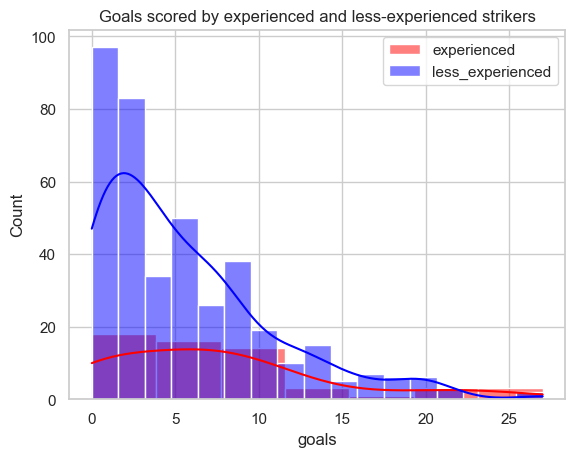

In [34]:
players_data = pd.read_csv("players_data.csv") 
players_transfers = pd.read_csv("players_transfers.csv") 
players_transfers_stats = pd.read_csv("players_stats.csv")

players_transfers_zf = players_transfers.copy()
players_transfers_zf["season"] = players_transfers_zf["season"].apply(lambda x: 2000 + int(x.split("/")[0]))
players_transfers_zf = players_transfers_zf[(players_transfers_zf["season"] <= 2021) & (players_transfers_zf["season"] >= 2021)]

players_transfers_zf = pd.merge(players_data, players_transfers_zf, on = ["player_id"])
players_transfers_zf = players_transfers_zf[["player_id", "given_name", "date_of_birth", "season", "date", "joined", "mv", "fee"]]

age_list=[]
for i in range(len(players_transfers_zf)):
    if players_transfers_zf.loc[i,"date_of_birth"] is not np.nan and players_transfers_zf.loc[i, "date"] is not np.nan:
        try:
            season_date = datetime.strptime(players_transfers_zf.loc[i, "date"], "%b %d, %Y")
        except ValueError:
            season_date = datetime.strptime(players_transfers_zf.loc[i, "date"], "%d-%b-%y")

        try:
            birth_date = datetime.strptime(players_transfers_zf.loc[i, "date_of_birth"], "%b %d, %Y")
            age = (season_date - birth_date).days // 365
        except ValueError:
            birth_date = datetime.strptime(players_transfers_zf.loc[i, "date_of_birth"], "%d-%b-%y")
            age = (season_date - birth_date).days // 365

        age_list.append(age)
    else:
        age_list.append(np.nan)

players_transfers_zf["age"] = age_list
players_transfers_zf.drop(columns = ["date", "date_of_birth"], inplace = True)
players_transfers_zf = pd.merge(players_transfers_zf, player_stats.rename(columns={"PlayerID": "player_id"}), on = ["player_id"]).drop_duplicates()
players_transfers_zf = players_transfers_zf[["player_id", "given_name", "age", "season", "joined", "mv", "fee", "goals", "clean_sheets", "goals_conceded", "minutes_played", "appearances"]]
players_transfers_zf = pd.merge(players_transfers_zf, club_players.rename(columns={"PlayerID": "player_id", "Season": "season"}), on = ["player_id", "season"])
players_transfers_zf = players_transfers_zf[["player_id", "given_name", "age", "season", "joined", "mv", "fee", "Player_possition", "goals", "clean_sheets", "goals_conceded", "minutes_played", "appearances"]]
football_striker_zf = players_transfers_zf[players_transfers_zf["Player_possition"].isin(["Centre-Forward", "Right Winger", "Left Winger", "Second Striker"])]
experienced = football_striker_zf[football_striker_zf["age"] >= 30]
less_experienced = football_striker_zf[football_striker_zf["age"] < 30]
sns.histplot(experienced["goals"], alpha = 0.5, kde = True, color = "red", label = "experienced")
sns.histplot(less_experienced["goals"], alpha = 0.5, kde = True, color = "blue", label = "less_experienced")
plt.legend()
plt.title("Goals scored by experienced and less-experienced strikers")
plt.show()

فرضیه‌ی دوم 🍗

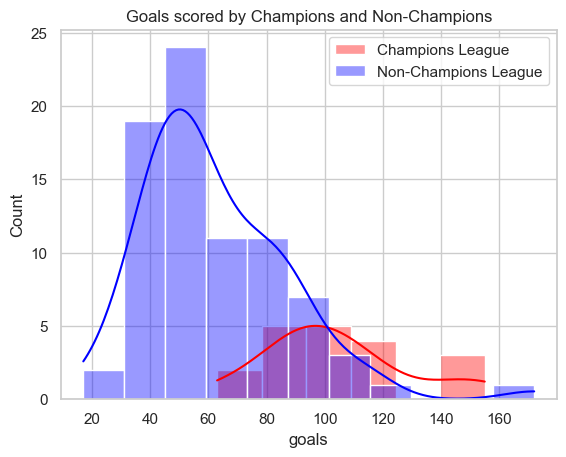

In [33]:
comparison_fz = Comparison.copy()
comparison_fz = comparison_fz[["League", "Club", "Rank", "goals"]].sort_values("Rank")
comparison_fz["Champions"] = comparison_fz["Rank"].isin([1, 2, 3, 4])
comparison_fz.loc[(comparison_fz["League"] == "Serie A") & (comparison_fz["Rank"] == 4), "Champions"] = False
comparison_fz[comparison_fz["Champions"]]["Club"].sort_values()
ttest_ind(comparison_fz[comparison_fz["Champions"] == True]["goals"], comparison_fz[comparison_fz["Champions"] == False]["goals"])
sns.histplot(comparison_fz[comparison_fz["Champions"]==True]["goals"], kde = True, color = "red", alpha = 0.4, label = "Champions League")
sns.histplot(comparison_fz[comparison_fz["Champions"] == False]["goals"], kde = True, color = "blue", alpha = 0.4, label = "Non-Champions League")
plt.legend()
plt.title("Goals scored by Champions and Non-Champions")
plt.show()